In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [6]:
FILE_PATH = 'player_stats.csv'
YOUR_RANDOM_STATE = 5024

df_full = None
df = pd.DataFrame()

try:
    df_full = pd.read_csv(FILE_PATH, encoding='latin1')
    print(f"'{FILE_PATH}' başarıyla 'latin1' kodlaması ile okundu.")
    print(f"Toplam satır sayısı: {len(df_full)}, Sütun sayısı: {len(df_full.columns)}")

    if len(df_full) >= 2000:
        df = df_full.sample(n=2000, random_state=YOUR_RANDOM_STATE)
        print(f"2000 satır başarıyla örneklendi. Yeni DataFrame boyutu: {df.shape}")
    elif len(df_full) > 0: 
        print(f"Uyarı: Veri setinde 2000'den az satır ({len(df_full)}) bulunuyor. Tüm veri seti kullanılacak.")
        df = df_full.copy() 
    else: 
        print("Hata: Veri dosyası okundu ancak içi boş.")

except FileNotFoundError:
    print(f"Hata: '{FILE_PATH}' adlı dosya bulunamadı. Lütfen dosya adını ve yolunu kontrol edin.")
except Exception as e:
    print(f"Veri okunurken bir hata oluştu: {e}")

if not df.empty:
    print("\nÖrneklenmiş verinin ilk 5 satırı:")
    print(df.head())
else:
    print("\nVeri yükleme başarısız oldu veya veri seti boş. Lütfen yukarıdaki mesajları kontrol edin.")

'player_stats.csv' başarıyla 'latin1' kodlaması ile okundu.
Toplam satır sayısı: 5682, Sütun sayısı: 41
2000 satır başarıyla örneklendi. Yeni DataFrame boyutu: (2000, 41)

Örneklenmiş verinin ilk 5 satırı:
               player    country  height  weight  age               club  \
2370   Rowllin Borges      India     182      72   31    Mumbai City FC    
5485    Ronny Labonne     France     180      76   25  NÃ®mes Olympique    
4178  Anyelberth Vera  Venezuela     161      61   21   Est. de MÃ©rida    
5426   Tyler Blackett    England     188      87   29     FC Cincinnati    
4177     Dong Honglin   China PR     188      72   27   Changchun Yatai    

      ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
2370            53         49      NaN            55  ...     33      47   
5485            63         59      NaN            63  ...     48      32   
4178            62         65      NaN            22  ...     55      61   
5426            65         65    

In [7]:
if not df.empty:
    print("\n--- Veri Seti Bilgileri (info) ---")
    df.info()

    print("\n--- Sayısal Sütunlar İçin Betimsel İstatistikler (describe) ---")
    print(df.describe())

    print("\n--- Kategorik Sütunlar İçin Betimsel İstatistikler (describe object) ---")
    if not df.select_dtypes(include='object').empty:
        print(df.describe(include=['object']))
    else:
        print("Veri setinde 'object' tipinde kategorik sütun bulunmamaktadır.")

    print("\n--- Tüm Sütunlar İçin Betimsel İstatistikler (describe all) ---")
    print(df.describe(include='all'))
else:
    print("Özet istatistikler için DataFrame boş.")


--- Veri Seti Bilgileri (info) ---
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2370 to 997
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          2000 non-null   object 
 1   country         2000 non-null   object 
 2   height          2000 non-null   int64  
 3   weight          2000 non-null   int64  
 4   age             2000 non-null   int64  
 5   club            2000 non-null   object 
 6   ball_control    2000 non-null   int64  
 7   dribbling       2000 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    2000 non-null   int64  
 10  stand_tackle    2000 non-null   int64  
 11  aggression      2000 non-null   int64  
 12  reactions       2000 non-null   int64  
 13  att_position    2000 non-null   int64  
 14  interceptions   2000 non-null   int64  
 15  vision          2000 non-null   int64  
 16  composure       2000 non-null   int64  
 17  

In [8]:
if not df.empty:
    print("\n--- Eksik Değer Kontrolü ---")
    missing_values = df.isnull().sum()
    print("Her sütundaki eksik değer sayısı:")
    print(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("\nVeri setinde hiç eksik değer bulunmamaktadır.")
    else:
        print(f"\nVeri setinde toplam {missing_values.sum()} adet eksik değer bulunmaktadır.")
else:
    print("Eksik değer kontrolü için DataFrame boş.")
    


--- Eksik Değer Kontrolü ---
Her sütundaki eksik değer sayısı:
marking    2000
dtype: int64

Veri setinde toplam 2000 adet eksik değer bulunmaktadır.


In [9]:
 # "Yapılan kontrolde, örneklenmiş 2000 satırlık veri setinde 'marking' adlı sütunun
        # tamamının (2000 değerin tümü) eksik olduğu tespit edilmiştir.
        # Tamamen boş olan bir sütunun analize veya modellemeye herhangi bir katkısı olmayacağı
        # ve anlamlı bir şekilde doldurulamayacağı için bu sütun veri setinden çıkarılmıştır.
        # Bu işlem sonrasında veri setinde başka eksik değer kalmamıştır."

In [10]:
if 'marking' in df.columns:
    is_all_missing = df['marking'].isnull().all()
    print(f"'marking' sütunundaki tüm değerler eksik mi? {is_all_missing}")
    print(f"Marking sütunundaki eşsiz değerler (NaN hariç): {df['marking'].dropna().unique()}")
    print(f"Marking sütununun veri tipi: {df['marking'].dtype}")
else:
    print("'marking' sütunu bulunamadı.")

'marking' sütunundaki tüm değerler eksik mi? True
Marking sütunundaki eşsiz değerler (NaN hariç): []
Marking sütununun veri tipi: float64


In [11]:
if 'marking' in df.columns and df['marking'].isnull().all():
    print("'marking' sütunundaki tüm değerler eksik olduğu için sütun veri setinden çıkarılıyor.")
    df.drop('marking', axis=1, inplace=True)
    print("'marking' sütunu başarıyla çıkarıldı.")
    print("\nGüncellenmiş eksik değer durumu:")
    missing_values_updated = df.isnull().sum()
    print(missing_values_updated[missing_values_updated > 0])
    if missing_values_updated.sum() == 0:
        print("Veri setinde başka eksik değer bulunmamaktadır.")
elif 'marking' in df.columns:
    print("'marking' sütununda kısmen eksik değerler var. Doldurma stratejisi belirlenmeli.")


'marking' sütunundaki tüm değerler eksik olduğu için sütun veri setinden çıkarılıyor.
'marking' sütunu başarıyla çıkarıldı.

Güncellenmiş eksik değer durumu:
Series([], dtype: int64)
Veri setinde başka eksik değer bulunmamaktadır.


In [12]:
print("\n--- Güncellenmiş Eksik Değer Kontrolü ---")
current_missing_values = df.isnull().sum()
print("Her sütundaki eksik değer sayısı:")
print(current_missing_values[current_missing_values > 0])

if current_missing_values.sum() == 0:
    print("\nVeri setinde başka eksik değer bulunmamaktadır.")
else:
    print(f"\nVeri setinde hala toplam {current_missing_values.sum()} adet eksik değer bulunmaktadır. Bu değerler incelenmeli.")


--- Güncellenmiş Eksik Değer Kontrolü ---
Her sütundaki eksik değer sayısı:
Series([], dtype: int64)

Veri setinde başka eksik değer bulunmamaktadır.


In [13]:
print("\n--- Kategorik Özellik Kontrolü ---")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if not categorical_cols:
    print("Veri setinde 'object' veya 'category' tipinde kategorik özellik bulunmamaktadır.")
else:
    print(f"Kategorik özellikler (sütun adları): {categorical_cols}")
    for col in categorical_cols:
        print(f"\n--- '{col}' Sütunu Detayları ---")
        print(f"Eşsiz değer sayısı: {df[col].nunique()}")
        print(f"İlk 5 eşsiz değer: {df[col].unique()[:5]}")
        print(f"Değerlerin dağılımı:\n{df[col].value_counts(normalize=True).head() * 100}") 


--- Kategorik Özellik Kontrolü ---
Kategorik özellikler (sütun adları): ['player', 'country', 'club', 'value']

--- 'player' Sütunu Detayları ---
Eşsiz değer sayısı: 1997
İlk 5 eşsiz değer: ['Rowllin Borges' 'Ronny Labonne' 'Anyelberth Vera' 'Tyler Blackett'
 'Dong Honglin']
Değerlerin dağılımı:
player
Curtis Davies      0.10
Cameron John       0.10
Maxime CrÃ©peau    0.10
Mattia Zanotti     0.05
Brian Ocampo       0.05
Name: proportion, dtype: float64

--- 'country' Sütunu Detayları ---
Eşsiz değer sayısı: 111
İlk 5 eşsiz değer: ['India' 'France' 'Venezuela' 'England' 'China PR']
Değerlerin dağılımı:
country
England      8.35
Germany      7.10
Spain        5.95
France       5.60
Argentina    5.35
Name: proportion, dtype: float64

--- 'club' Sütunu Detayları ---
Eşsiz değer sayısı: 646
İlk 5 eşsiz değer: ['Mumbai City FC ' 'NÃ®mes Olympique ' 'Est. de MÃ©rida ' 'FC Cincinnati '
 'Changchun Yatai ']
Değerlerin dağılımı:
club
River Plate     0.55
Dynamo Kyiv     0.45
RB Salzburg     0.4

In [14]:
if 'value' in df.columns:
    original_value_str = df['value'].astype(str)
    
    cleaned_value_str = original_value_str.str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()

    def convert_value_final(val_str):
        if pd.isna(val_str) or val_str == '':
            return np.nan
        
        val_str_upper = val_str.upper()
        
        try:
            if 'M' in val_str_upper:
                return float(val_str_upper.replace('M', '')) * 1_000_000
            elif 'K' in val_str_upper:
                return float(val_str_upper.replace('K', '')) * 1_000
            else:
                # M veya K yoksa, tüm '.' karakterlerini kaldır
                return float(val_str_upper.replace('.', ''))
        except ValueError:
            return np.nan 

    df['value'] = cleaned_value_str.apply(convert_value_final)

    nan_count_after_conversion = df['value'].isnull().sum()
    if nan_count_after_conversion == 0:
        print(f"'value' sütunu başarıyla sayısala dönüştürüldü. Hiç NaN değer kalmadı.")
    else:
        print(f"Uyarı: 'value' sütunu dönüştürüldükten sonra {nan_count_after_conversion} adet NaN değer kaldı. Lütfen kontrol edin.")

    print("\nGüncellenmiş 'value' sütunu bilgileri:")
    print(df[['value']].head())
    print(df[['value']].info())
else:
    print("'value' sütunu DataFrame'de bulunamadı.")

'value' sütunu başarıyla sayısala dönüştürüldü. Hiç NaN değer kalmadı.

Güncellenmiş 'value' sütunu bilgileri:
        value
2370  19000.0
5485  27500.0
4178  27500.0
5426  62500.0
4177  12000.0
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2370 to 997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB
None


In [15]:
#Veriyi okuduk (latin1 encoding ile).
#2000 satır örneklem aldık.
#Eksik değer kontrolü yaptık:
#marking sütununu tamamen eksik olduğu için sildik.
#Kategorik özellikleri inceledik:
#player, country, club sütunlarının yüksek kardinaliteye sahip olduğunu belirledik ve bunlar için işleme stratejileri planladık (modelleme öncesi uygulanacak).
#value sütununu 'object' tipinden float64 tipine başarıyla dönüştürdük, tüm string formatlama sorunlarını çözdük.

In [16]:
print("--- Veri Seti Bilgileri (info) ---")
df.info()

print("\n--- Sayısal Sütunlar İçin Betimsel İstatistikler ---")
# Sadece sayısal sütunları seçelim ve value sütununu daha okunaklı formatlayalım
pd.options.display.float_format = '{:.2f}'.format # Floatları 2 ondalıkla göster
print(df.describe())
pd.reset_option('display.float_format') # Ayarı sıfırla

print("\n--- Kategorik Sütunlar İçin Betimsel İstatistikler ---")
if not df.select_dtypes(include='object').empty:
    print(df.describe(include=['object']))
else:
    print("Veri setinde 'object' tipinde kategorik sütun bulunmamaktadır (player, country, club hariç).")
    print(df[['player', 'country', 'club']].describe())


print("\n--- Verinin İlk 5 Satırı ---")
print(df.head())

--- Veri Seti Bilgileri (info) ---
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2370 to 997
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          2000 non-null   object 
 1   country         2000 non-null   object 
 2   height          2000 non-null   int64  
 3   weight          2000 non-null   int64  
 4   age             2000 non-null   int64  
 5   club            2000 non-null   object 
 6   ball_control    2000 non-null   int64  
 7   dribbling       2000 non-null   int64  
 8   slide_tackle    2000 non-null   int64  
 9   stand_tackle    2000 non-null   int64  
 10  aggression      2000 non-null   int64  
 11  reactions       2000 non-null   int64  
 12  att_position    2000 non-null   int64  
 13  interceptions   2000 non-null   int64  
 14  vision          2000 non-null   int64  
 15  composure       2000 non-null   int64  
 16  crossing        2000 non-null   int64  
 17  s


--- Hedef Değişken (value) Analizi ---


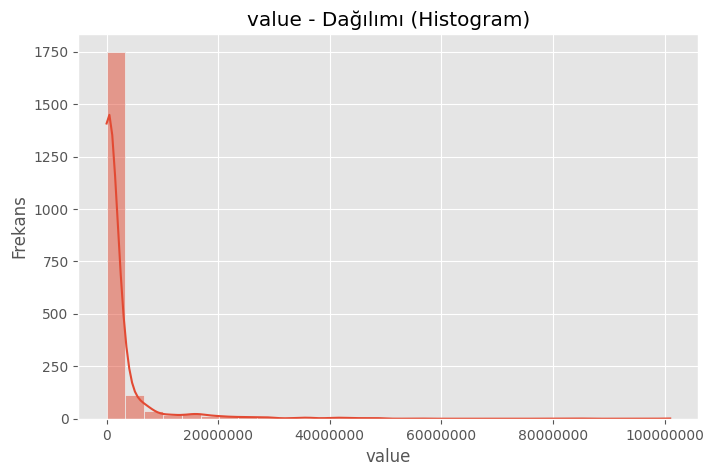

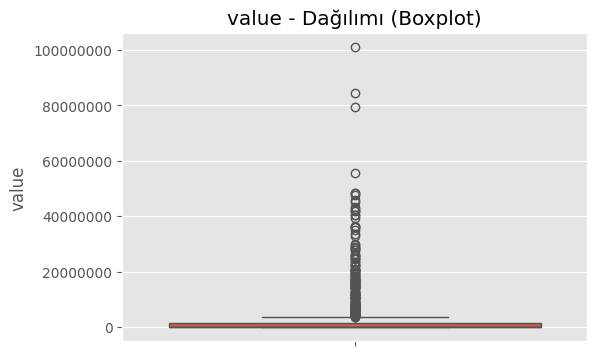

value çarpıklık (skewness): 6.77


In [17]:
TARGET_COLUMN_NAME = 'value' 

print(f"\n--- Hedef Değişken ({TARGET_COLUMN_NAME}) Analizi ---")

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df[TARGET_COLUMN_NAME], kde=True, bins=30)
plt.title(f'{TARGET_COLUMN_NAME} - Dağılımı (Histogram)')
plt.xlabel(TARGET_COLUMN_NAME)
plt.ylabel('Frekans')
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[TARGET_COLUMN_NAME])
plt.title(f'{TARGET_COLUMN_NAME} - Dağılımı (Boxplot)')
plt.ylabel(TARGET_COLUMN_NAME)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

print(f"{TARGET_COLUMN_NAME} çarpıklık (skewness): {df[TARGET_COLUMN_NAME].skew():.2f}")


--- Diğer Sayısal Özelliklerin Dağılımı ---


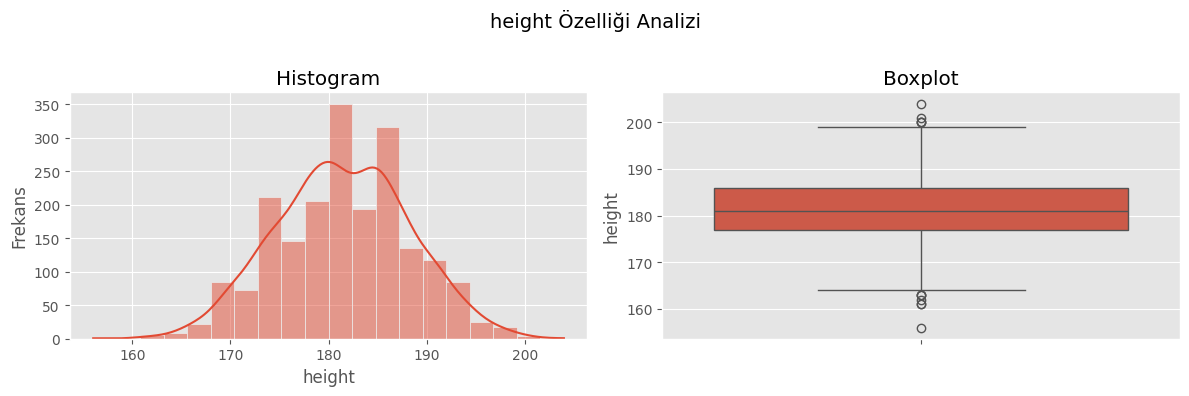

height çarpıklık (skewness): -0.03


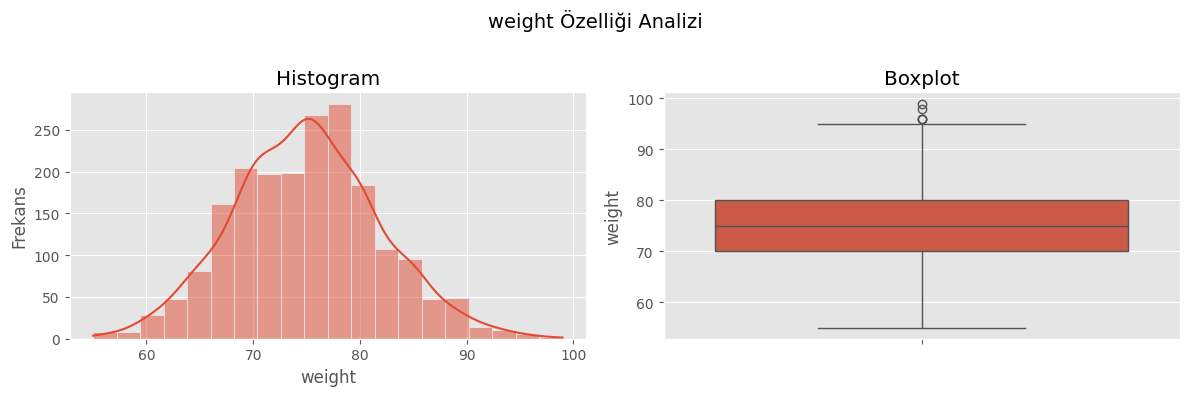

weight çarpıklık (skewness): 0.14


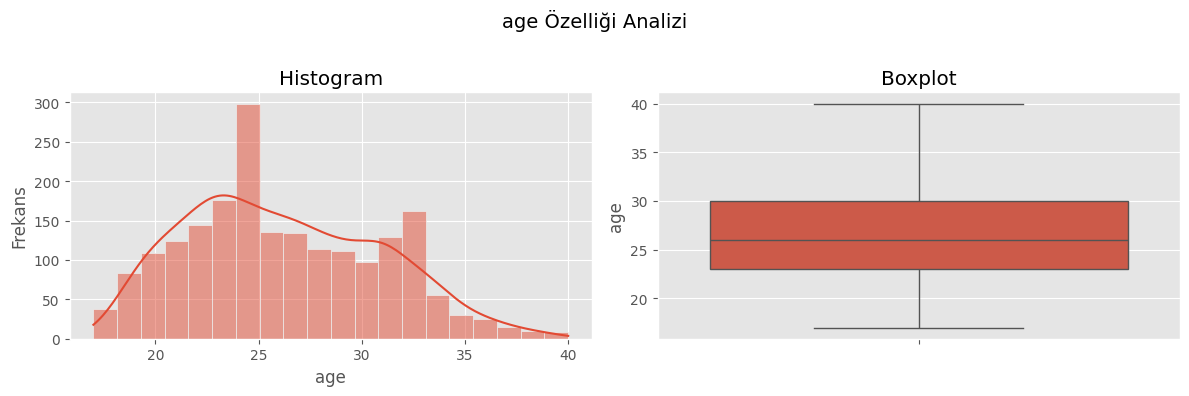

age çarpıklık (skewness): 0.35


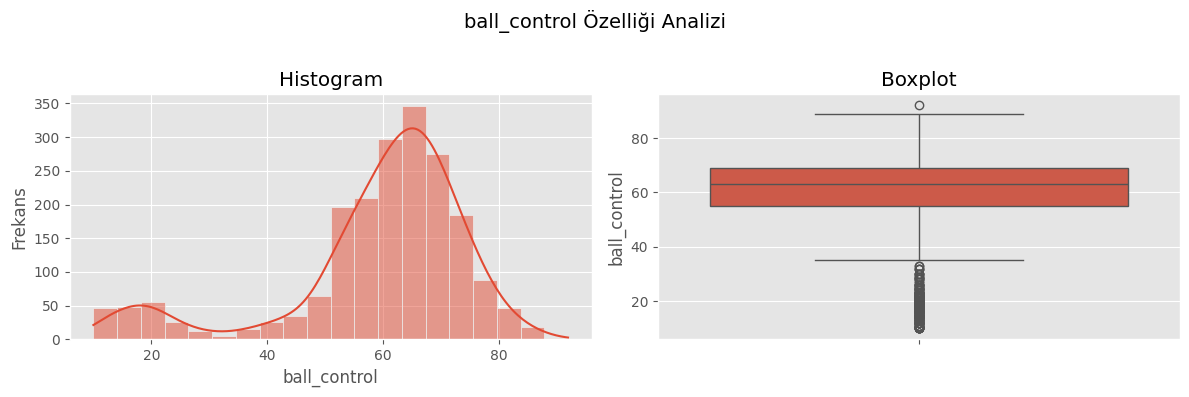

ball_control çarpıklık (skewness): -1.44


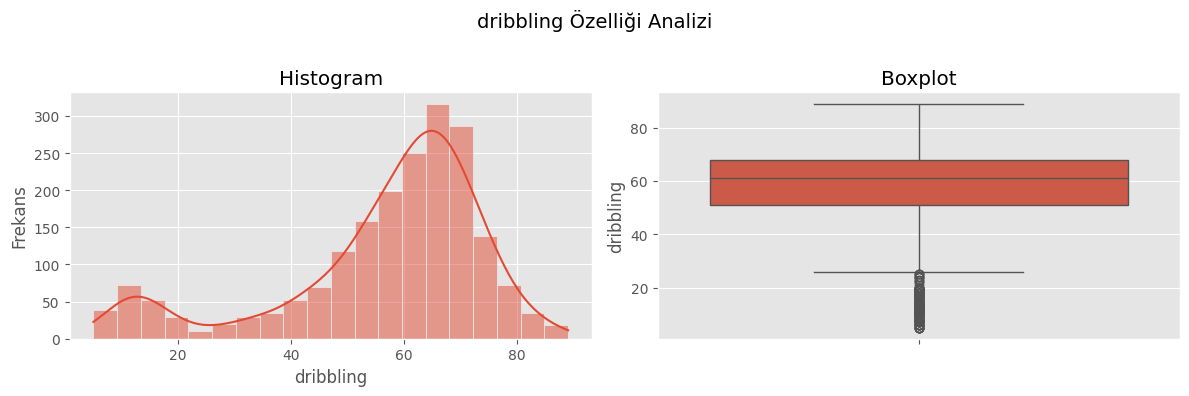

dribbling çarpıklık (skewness): -1.22


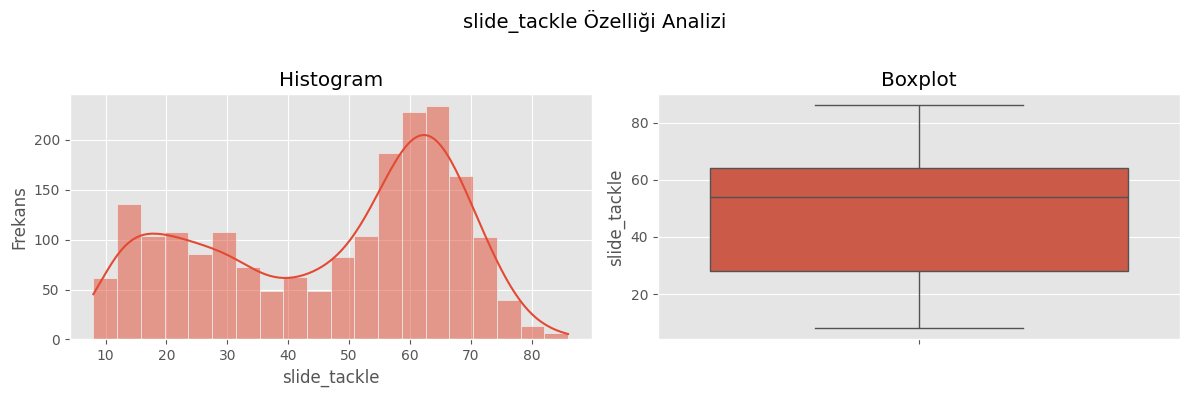

slide_tackle çarpıklık (skewness): -0.39


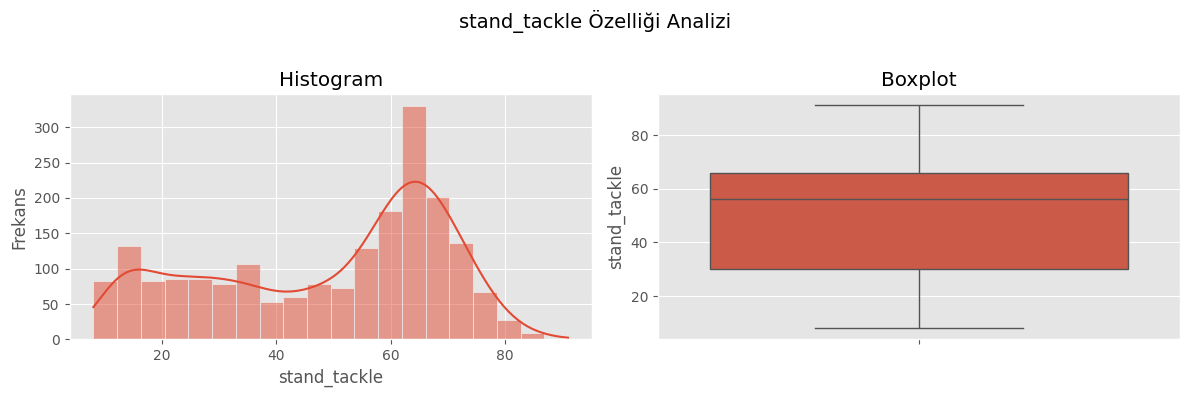

stand_tackle çarpıklık (skewness): -0.46


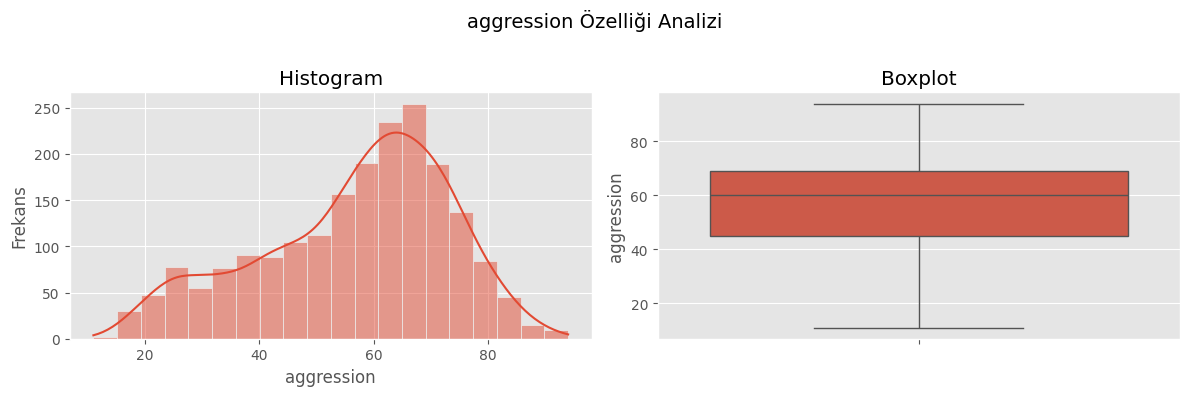

aggression çarpıklık (skewness): -0.52


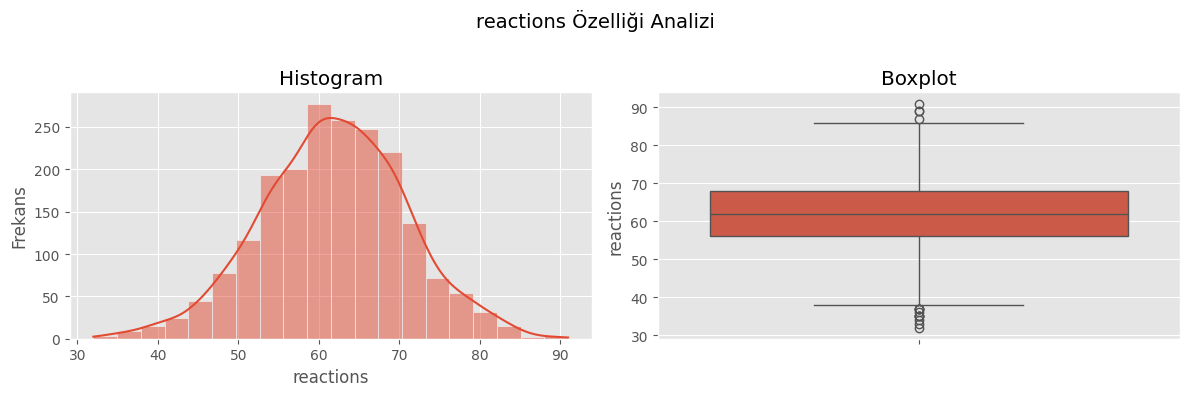

reactions çarpıklık (skewness): -0.10


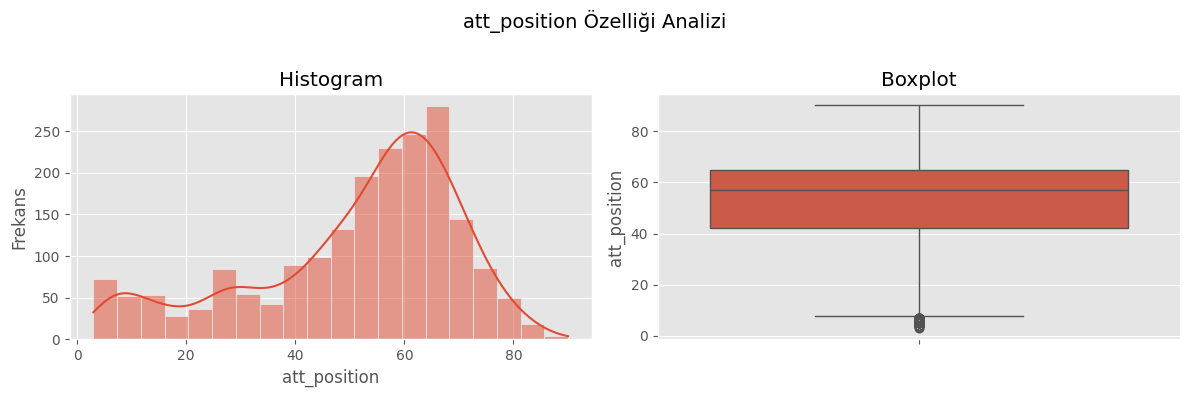

att_position çarpıklık (skewness): -0.88


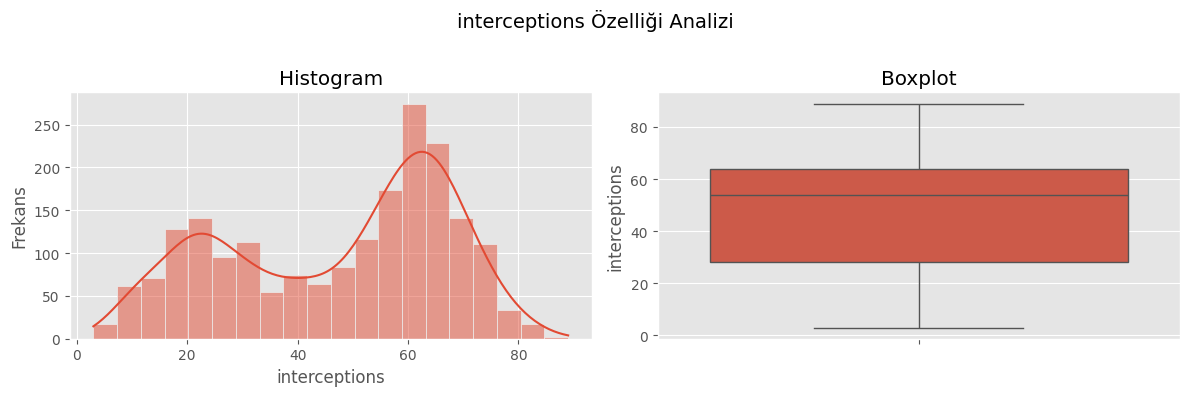

interceptions çarpıklık (skewness): -0.38


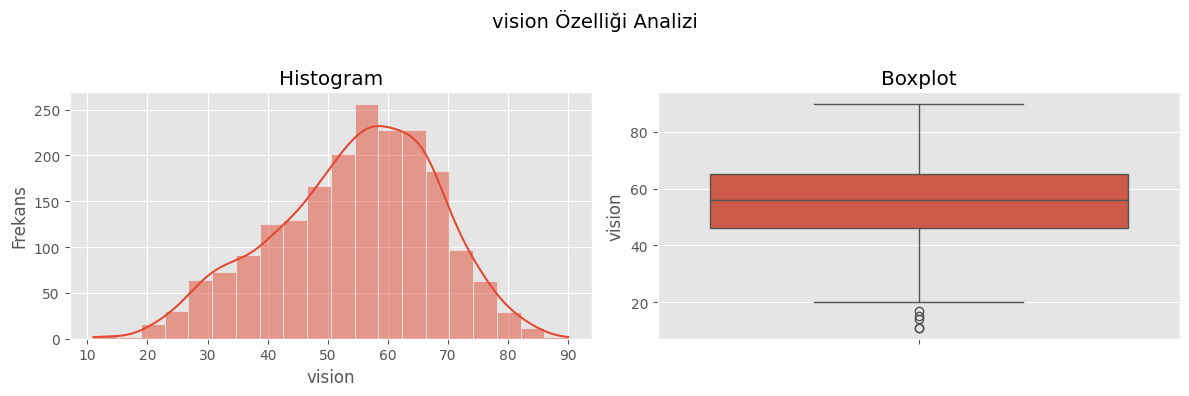

vision çarpıklık (skewness): -0.36


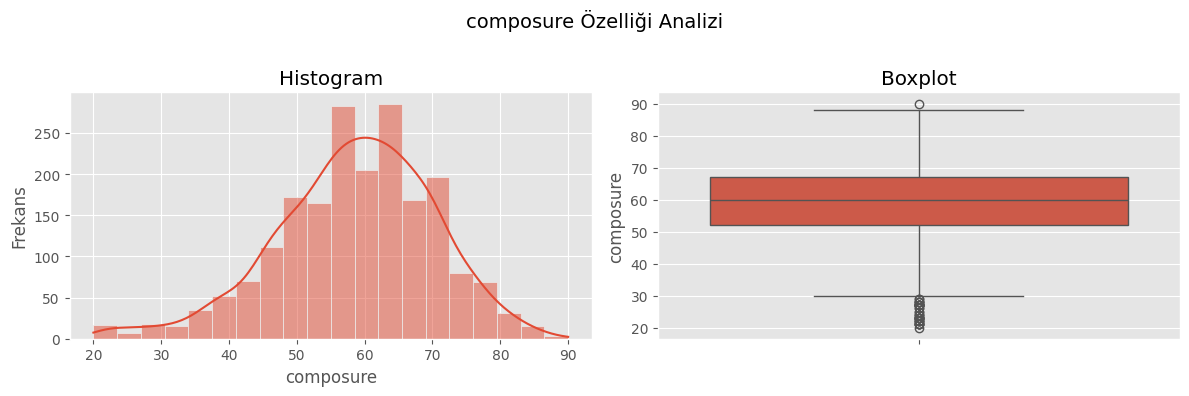

composure çarpıklık (skewness): -0.46


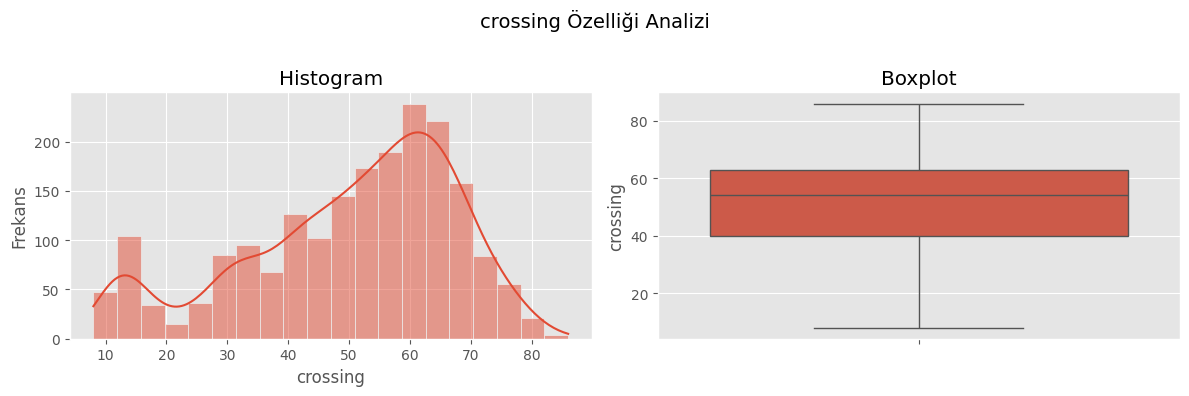

crossing çarpıklık (skewness): -0.67


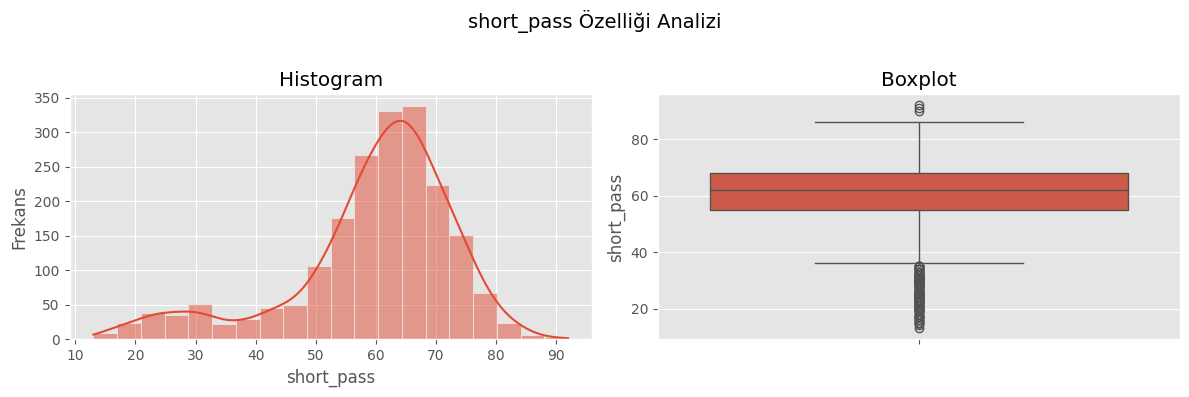

short_pass çarpıklık (skewness): -1.18


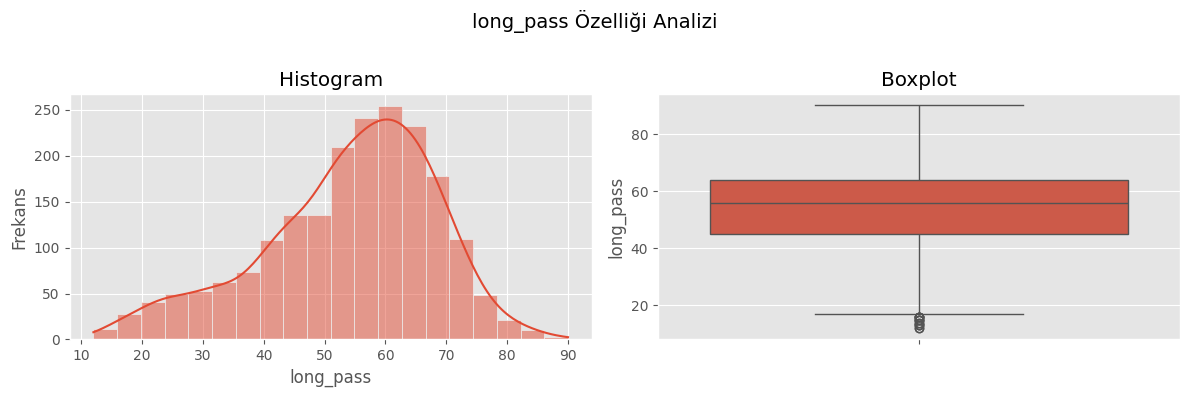

long_pass çarpıklık (skewness): -0.61


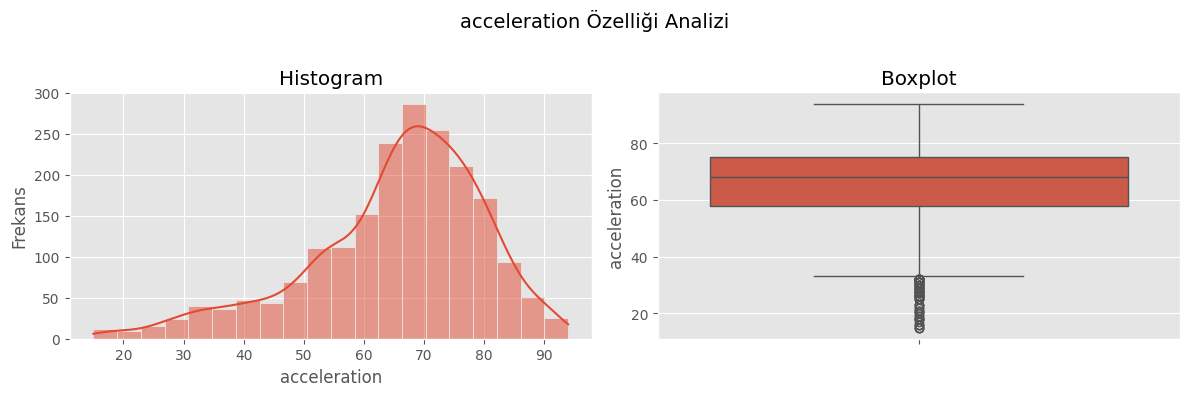

acceleration çarpıklık (skewness): -0.88


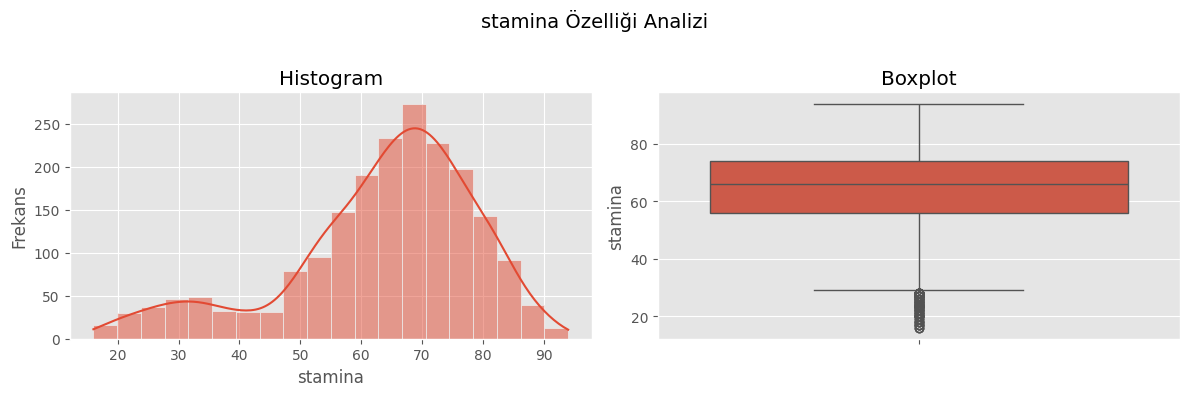

stamina çarpıklık (skewness): -0.93


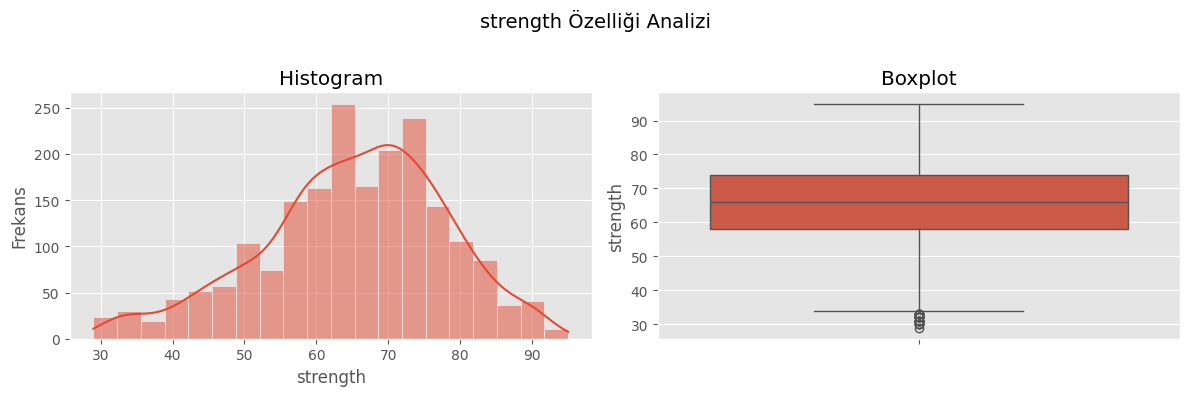

strength çarpıklık (skewness): -0.40


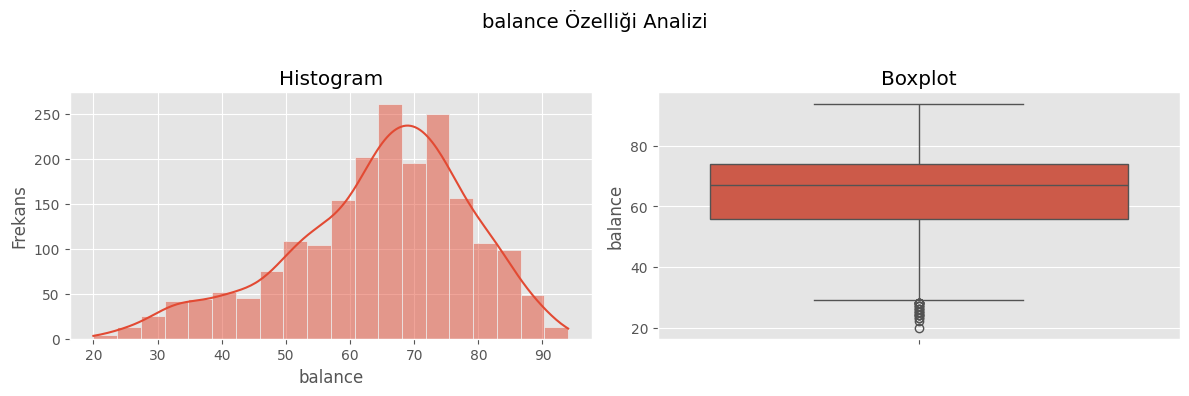

balance çarpıklık (skewness): -0.61


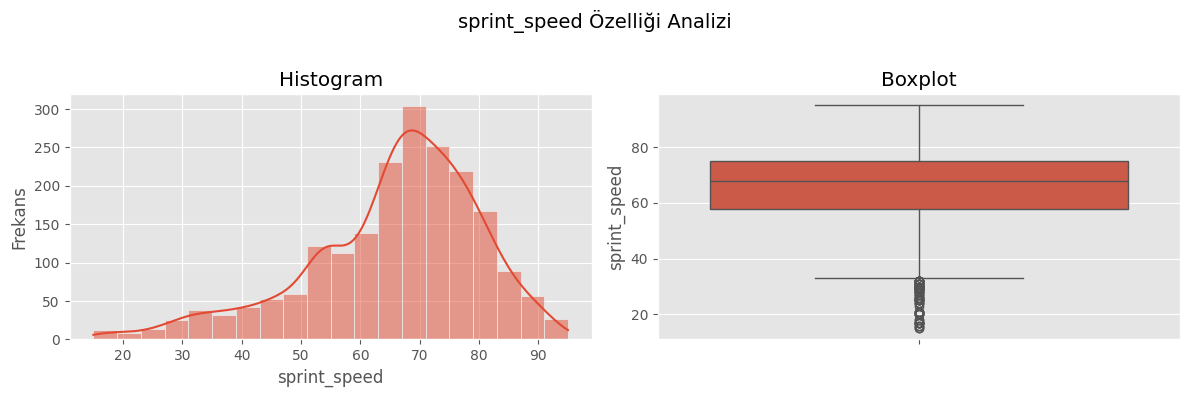

sprint_speed çarpıklık (skewness): -0.87


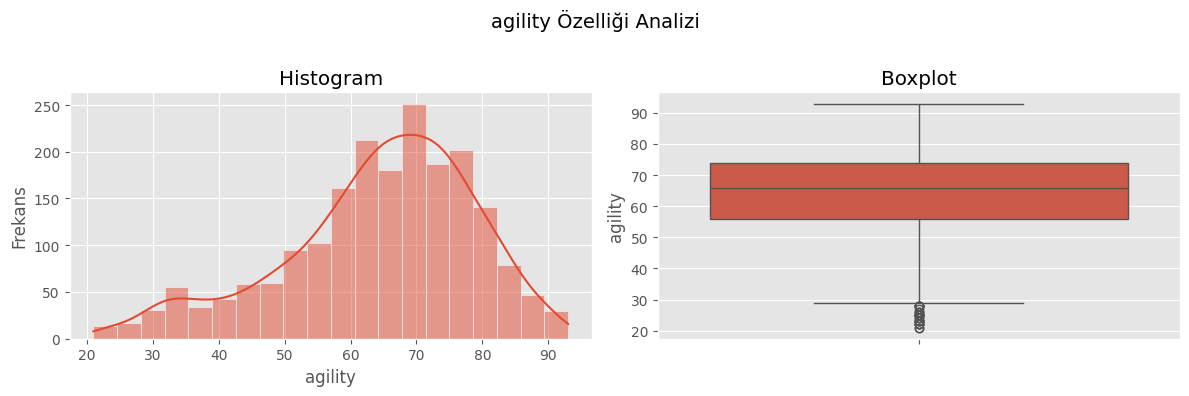

agility çarpıklık (skewness): -0.69


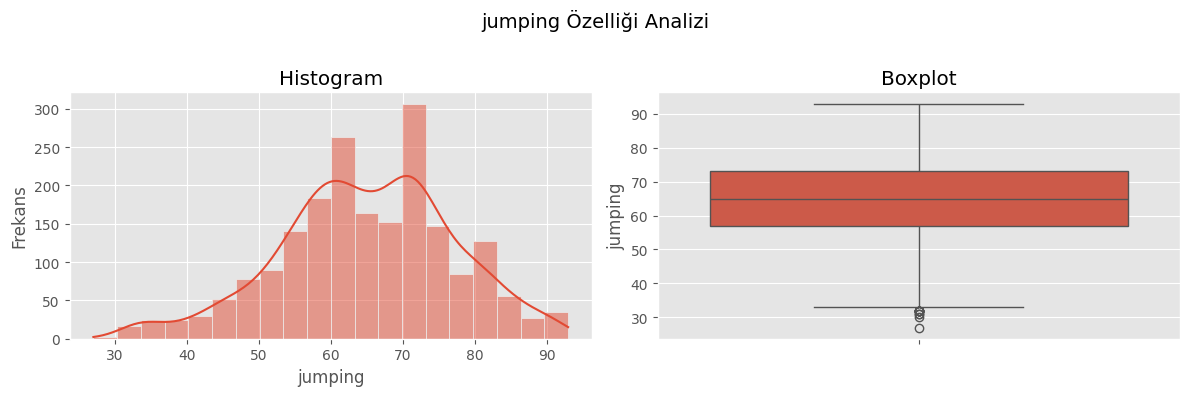

jumping çarpıklık (skewness): -0.26


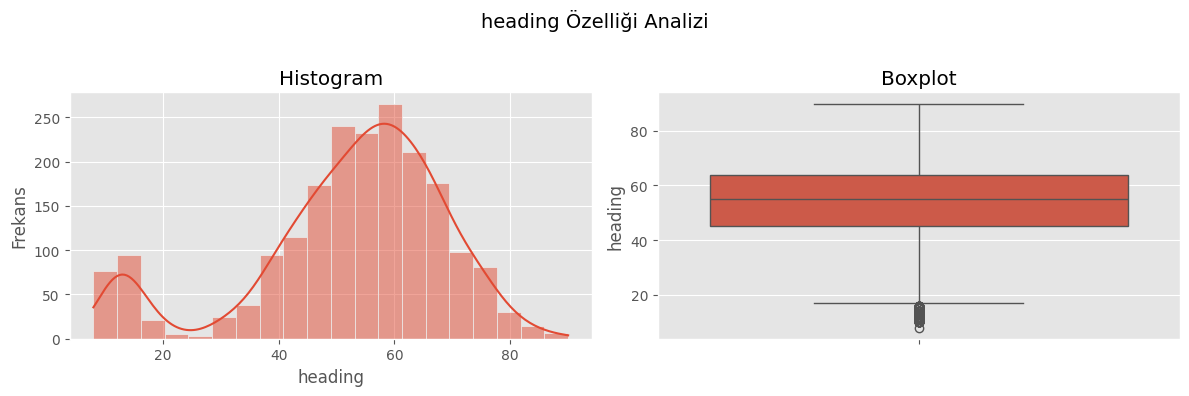

heading çarpıklık (skewness): -0.92


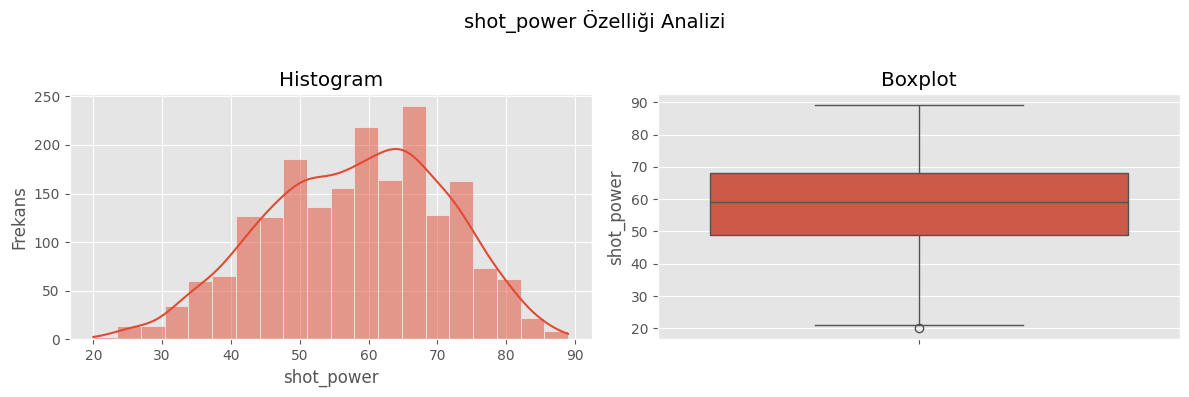

shot_power çarpıklık (skewness): -0.21


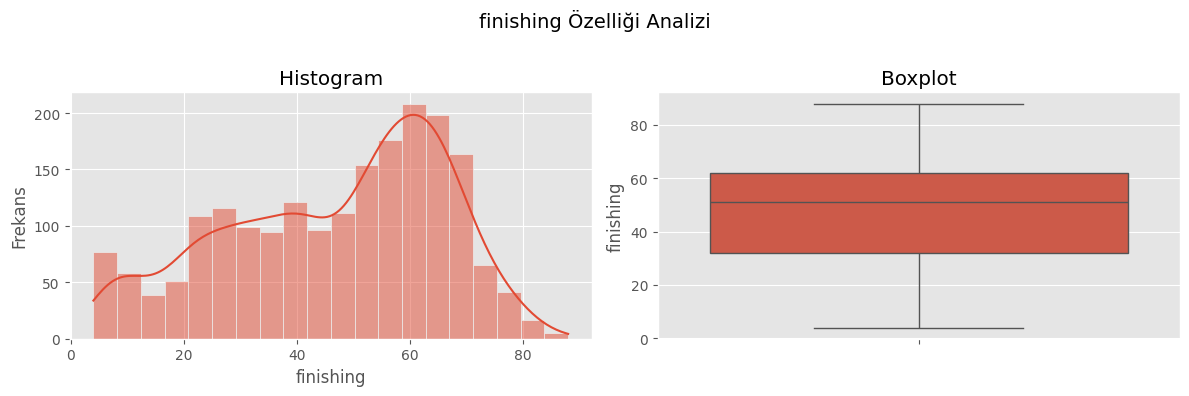

finishing çarpıklık (skewness): -0.42


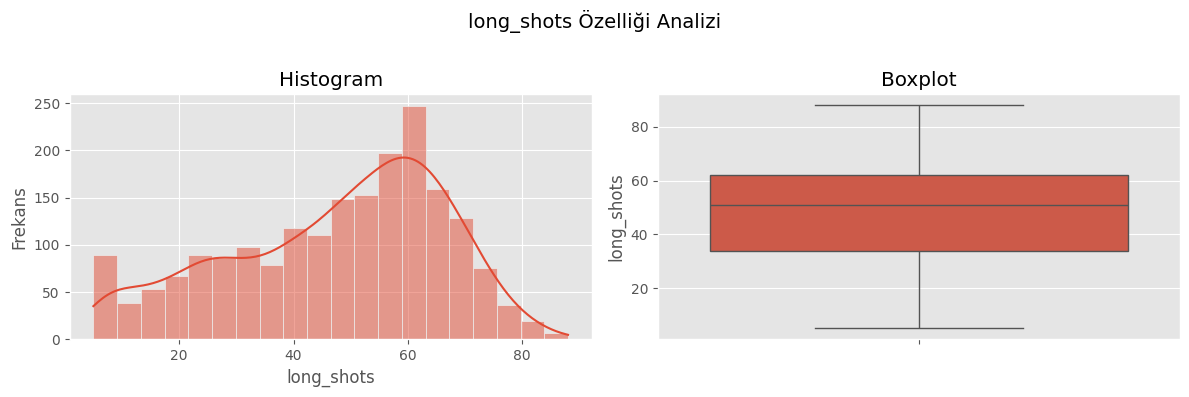

long_shots çarpıklık (skewness): -0.48


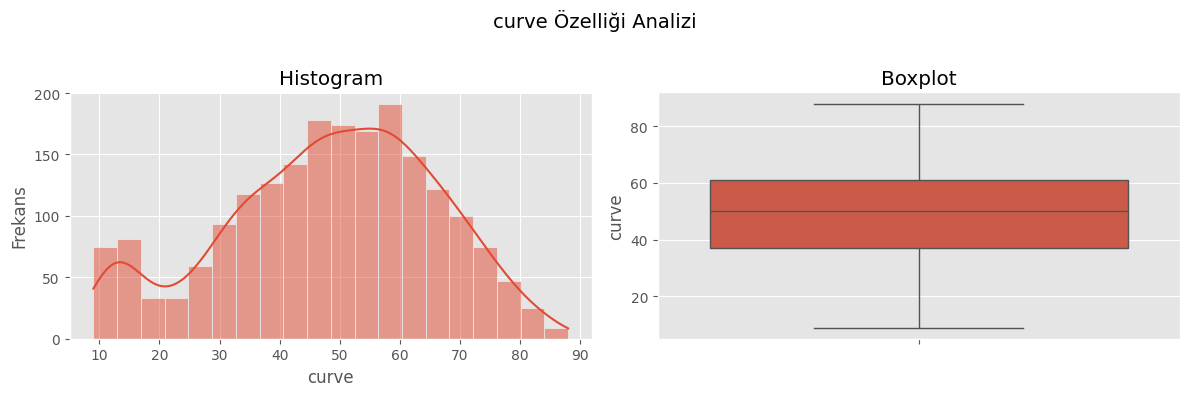

curve çarpıklık (skewness): -0.33


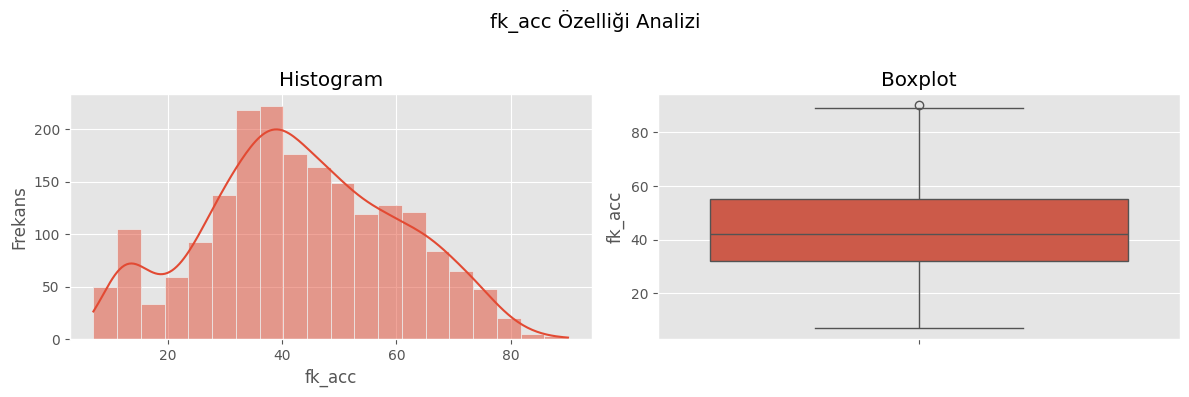

fk_acc çarpıklık (skewness): 0.05


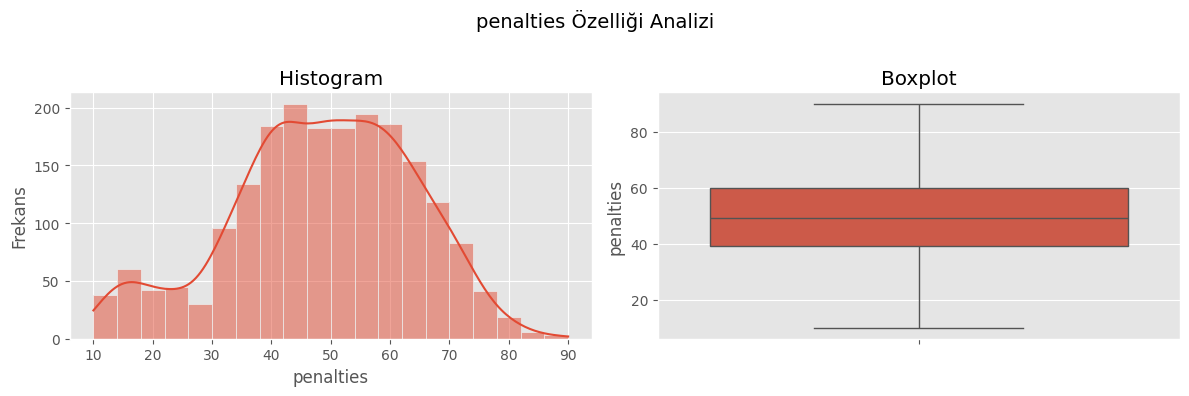

penalties çarpıklık (skewness): -0.33


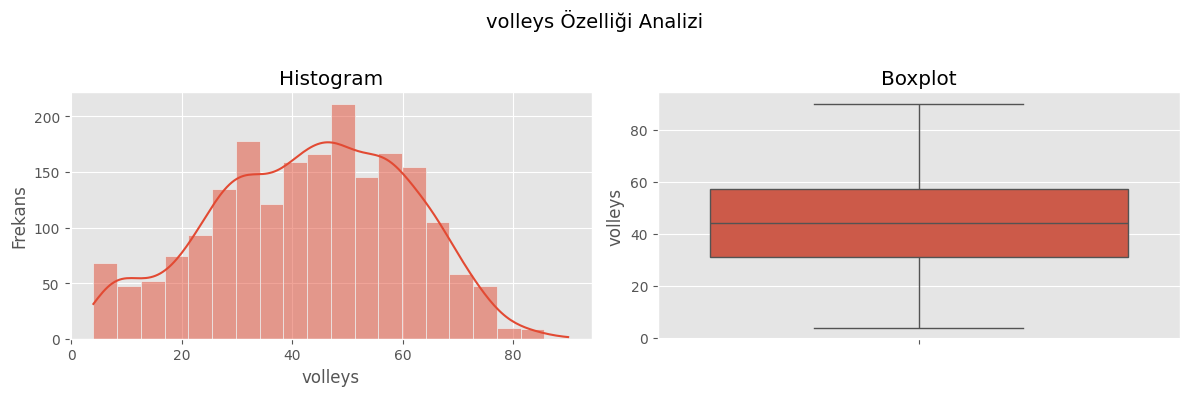

volleys çarpıklık (skewness): -0.19


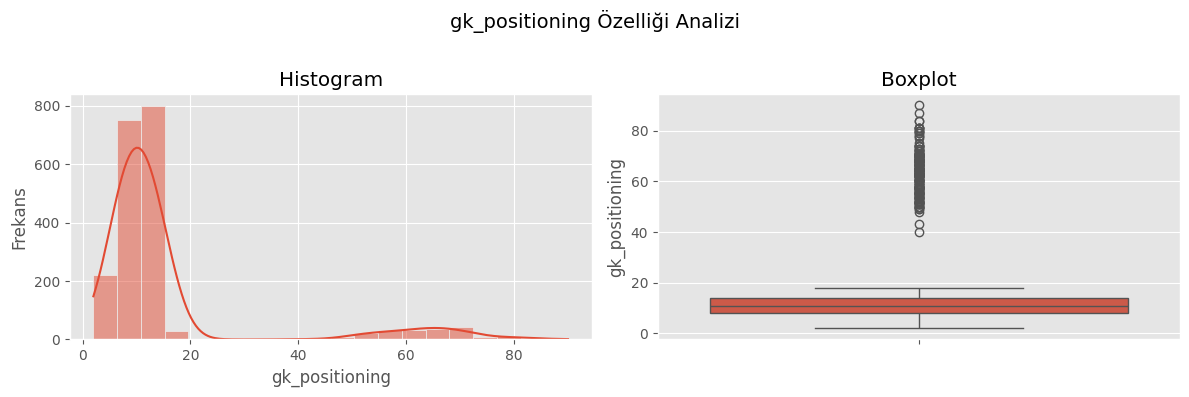

gk_positioning çarpıklık (skewness): 2.66


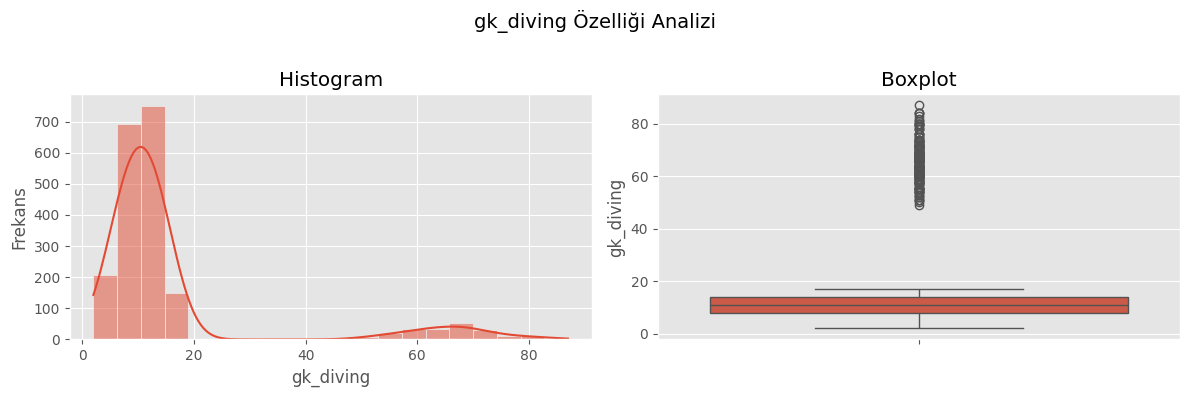

gk_diving çarpıklık (skewness): 2.63


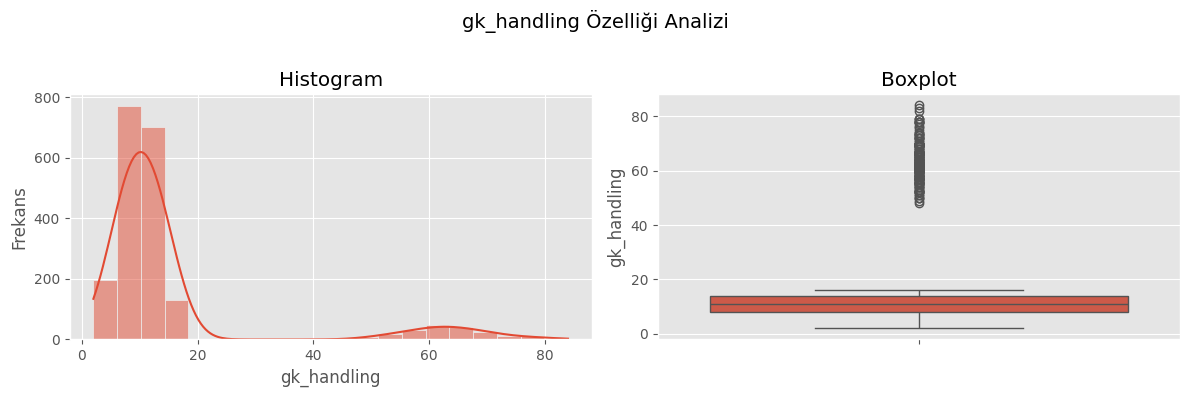

gk_handling çarpıklık (skewness): 2.63


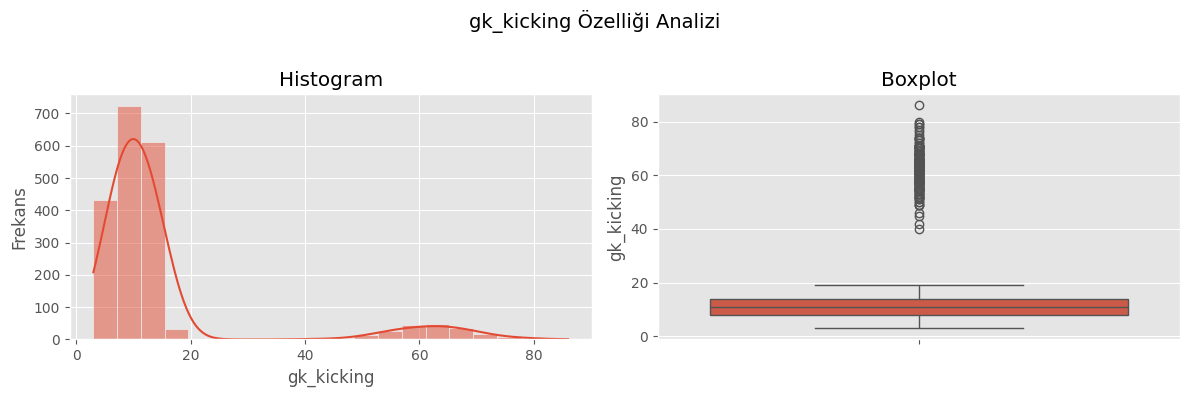

gk_kicking çarpıklık (skewness): 2.61


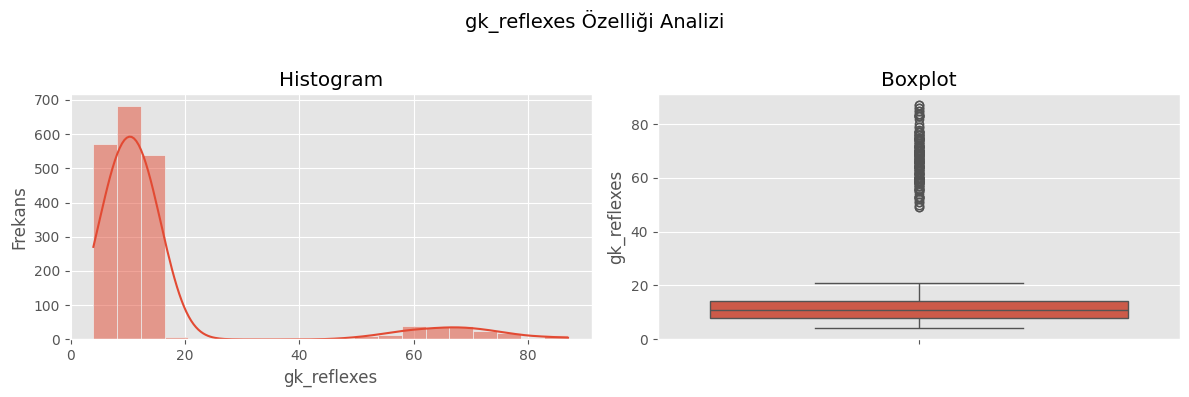

gk_reflexes çarpıklık (skewness): 2.65


In [18]:
print("\n--- Diğer Sayısal Özelliklerin Dağılımı ---")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    if col == TARGET_COLUMN_NAME: # Hedef değişkeni atla, zaten analiz ettik
        continue
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'{col} Özelliği Analizi', fontsize=14) # Ana başlık

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20) # Daha az bin deneyebiliriz
    plt.title('Histogram')
    plt.xlabel(col)
    plt.ylabel('Frekans')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title('Boxplot')
    plt.ylabel(col)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ana başlıkla çakışmaması için
    plt.show()
    print(f"{col} çarpıklık (skewness): {df[col].skew():.2f}")


--- Kategorik Özelliklerin Dağılımı ('player' hariç) ---


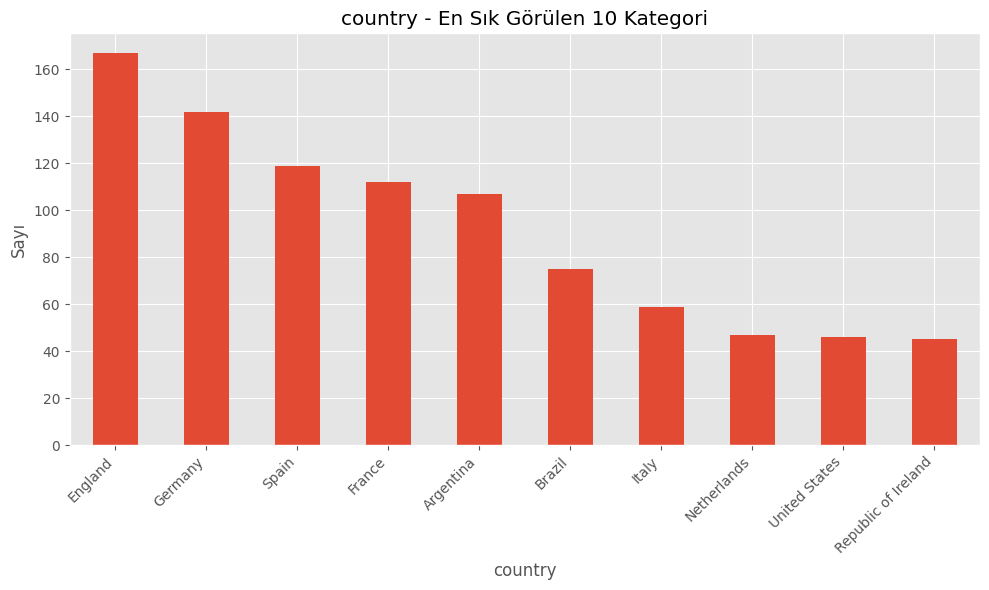


'country' sütunundaki ilk 10 kategori ve sayıları:
country
England                167
Germany                142
Spain                  119
France                 112
Argentina              107
Brazil                  75
Italy                   59
Netherlands             47
United States           46
Republic of Ireland     45
Name: count, dtype: int64


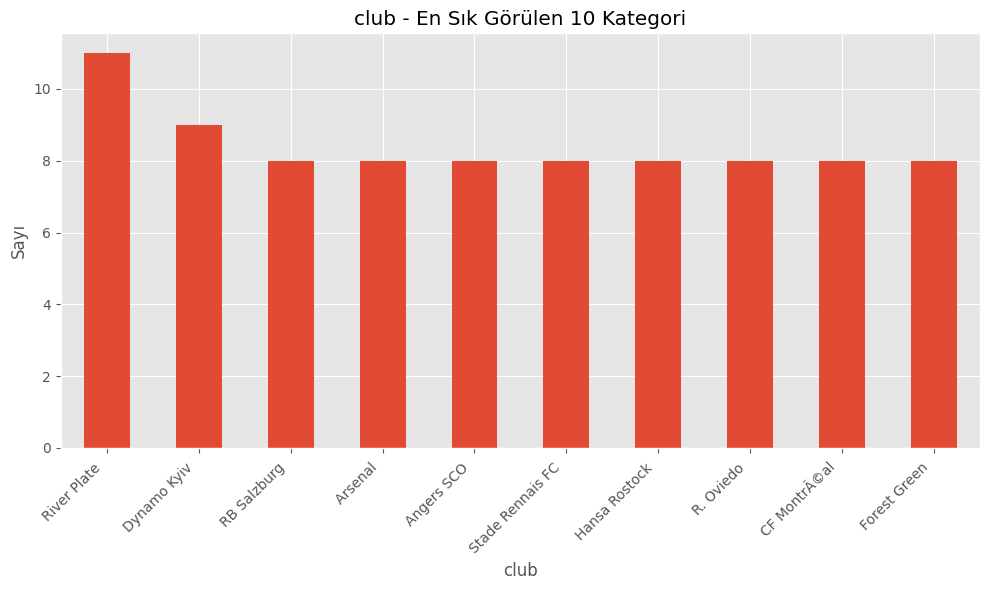


'club' sütunundaki ilk 10 kategori ve sayıları:
club
River Plate          11
Dynamo Kyiv           9
RB Salzburg           8
Arsenal               8
Angers SCO            8
Stade Rennais FC      8
Hansa Rostock         8
R. Oviedo             8
CF MontrÃ©al          8
Forest Green          8
Name: count, dtype: int64


In [19]:
print("\n--- Kategorik Özelliklerin Dağılımı ('player' hariç) ---")
categorical_cols_to_plot = [col for col in ['country', 'club'] if col in df.columns] 

for col in categorical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    top_n = 10
    df[col].value_counts().nlargest(top_n).plot(kind='bar')
    plt.title(f'{col} - En Sık Görülen {top_n} Kategori')
    plt.xlabel(col)
    plt.ylabel('Sayı')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print(f"\n'{col}' sütunundaki ilk {top_n} kategori ve sayıları:")
    print(df[col].value_counts().nlargest(top_n))


--- Sayısal Özellikler Arası Korelasyon ---


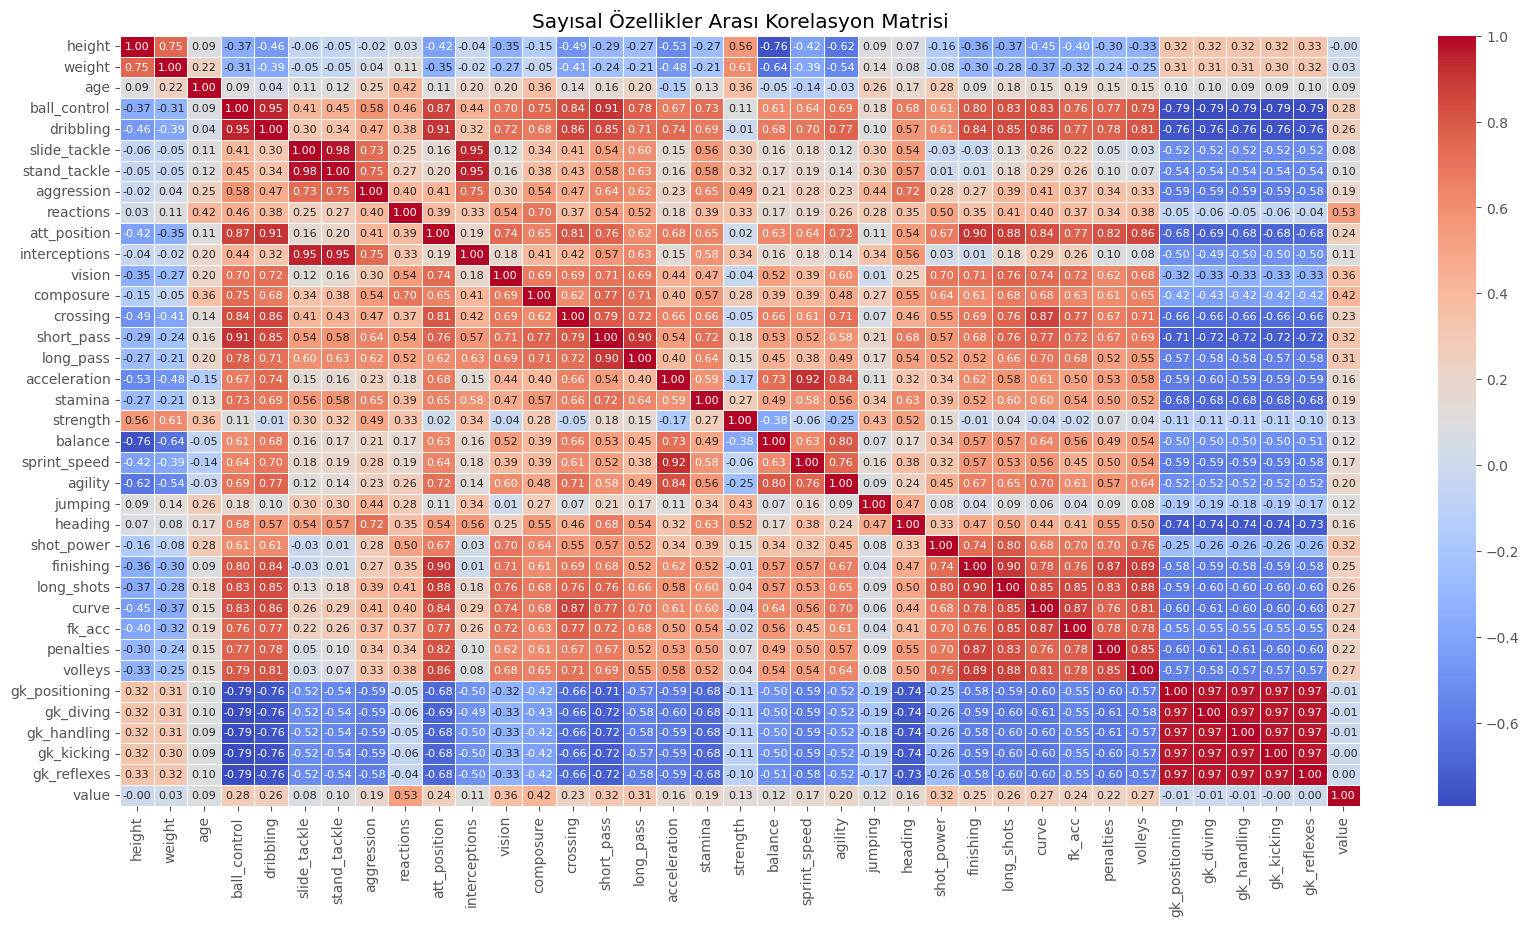

In [20]:
print("\n--- Sayısal Özellikler Arası Korelasyon ---")
if len(numerical_cols) > 1:
    plt.figure(figsize=(20, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Sayısal Özellikler Arası Korelasyon Matrisi')
    plt.show()
else:
    print("Korelasyon matrisi için yeterli sayıda (en az 2) sayısal özellik bulunmamaktadır.")


--- 'value' (value) ile Diğer Sayısal Özellikler Arasındaki İlişkiler (Scatter Plots) ---


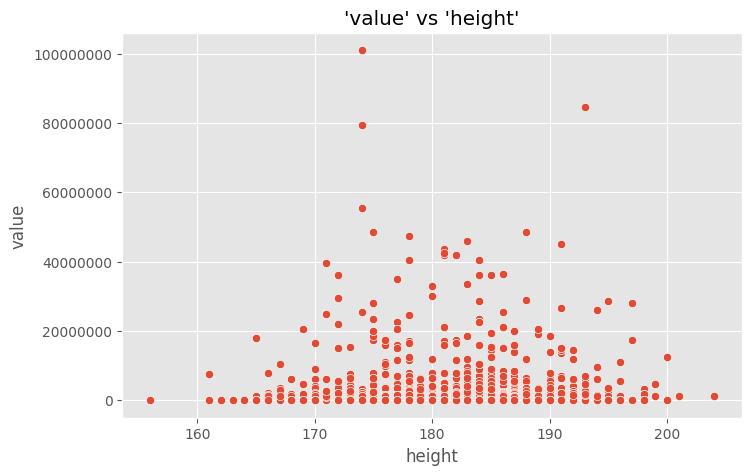

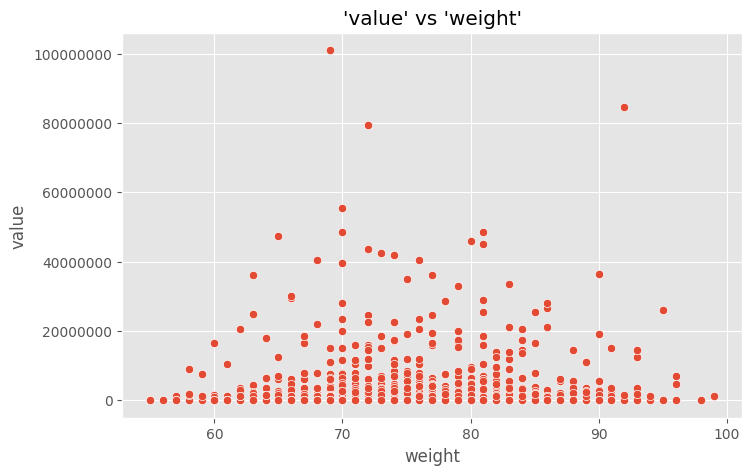

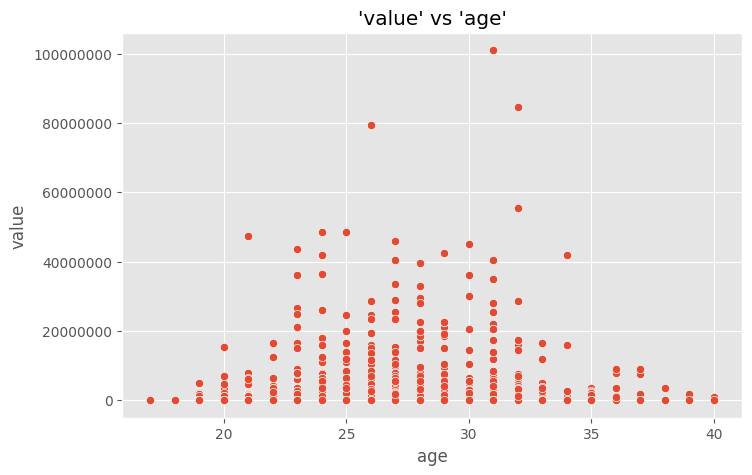

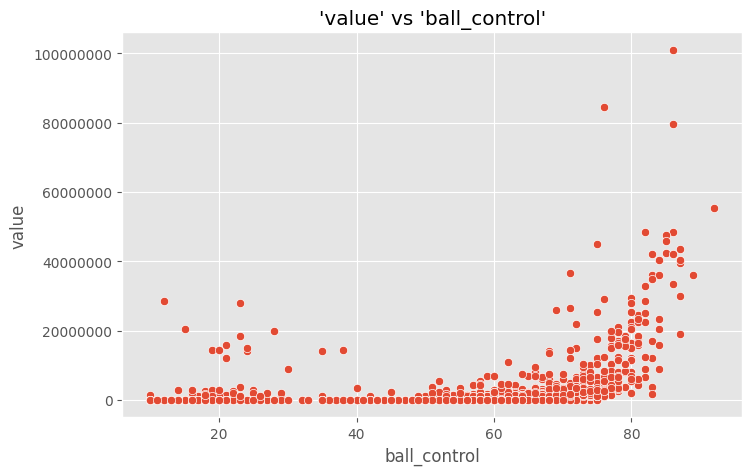

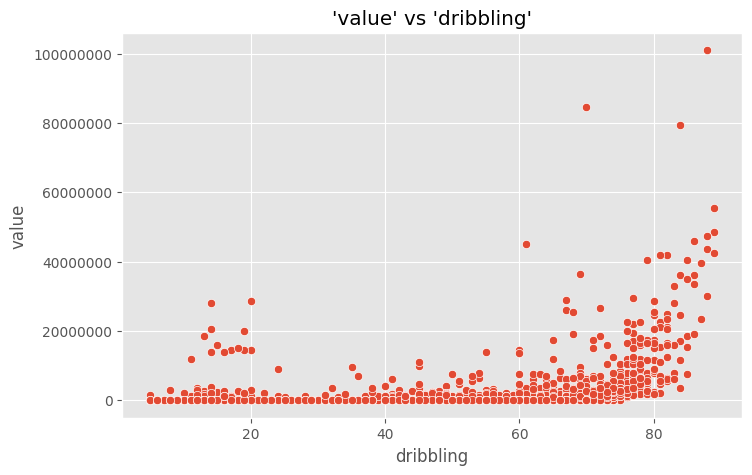

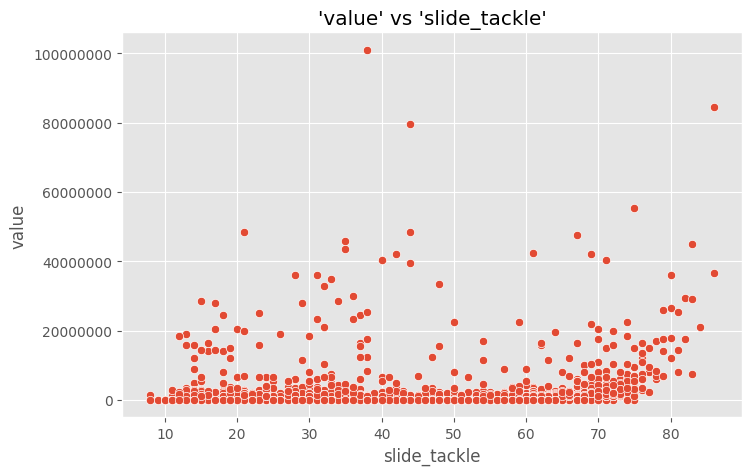

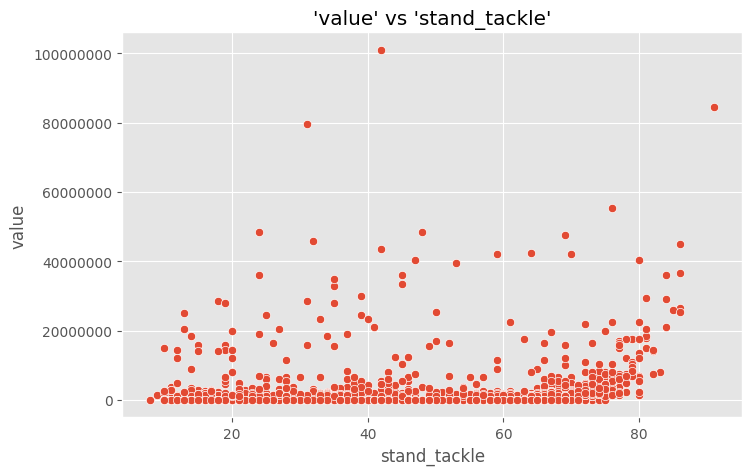

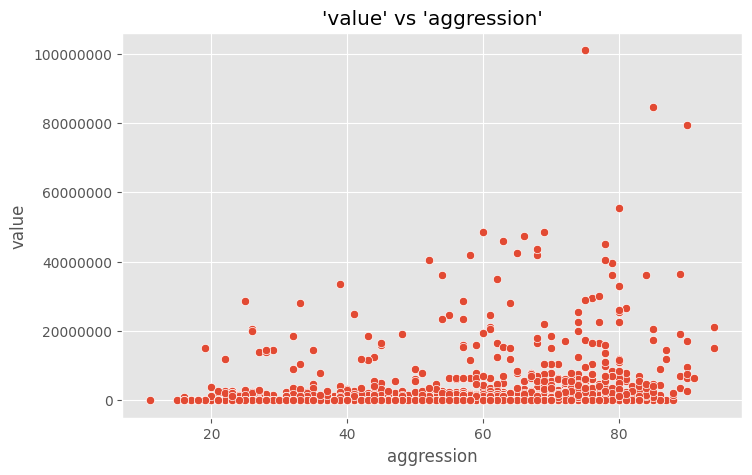

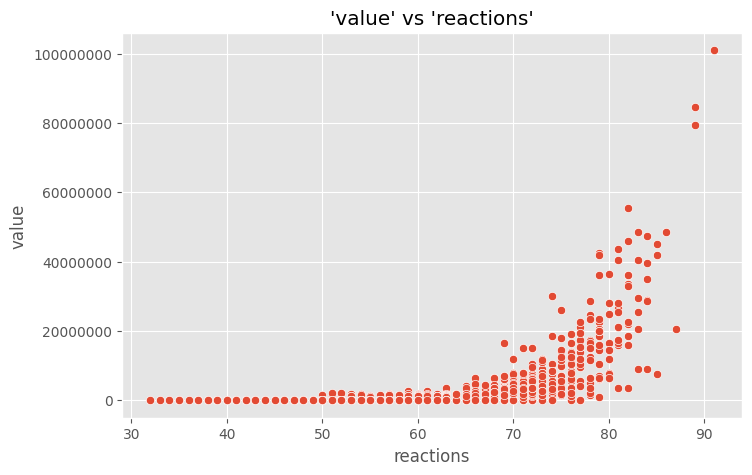

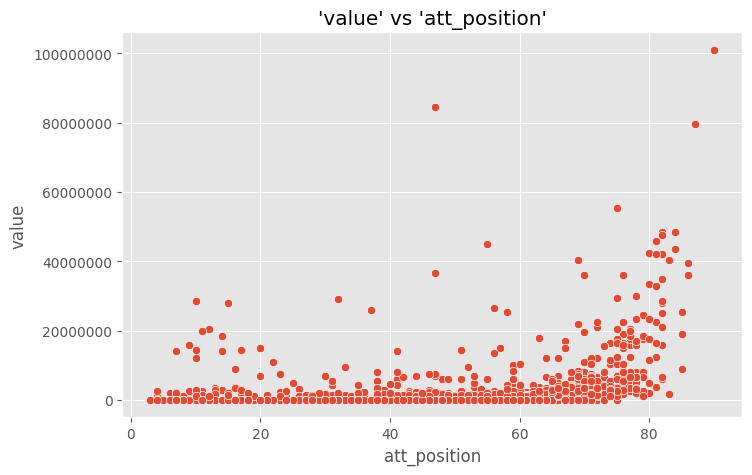

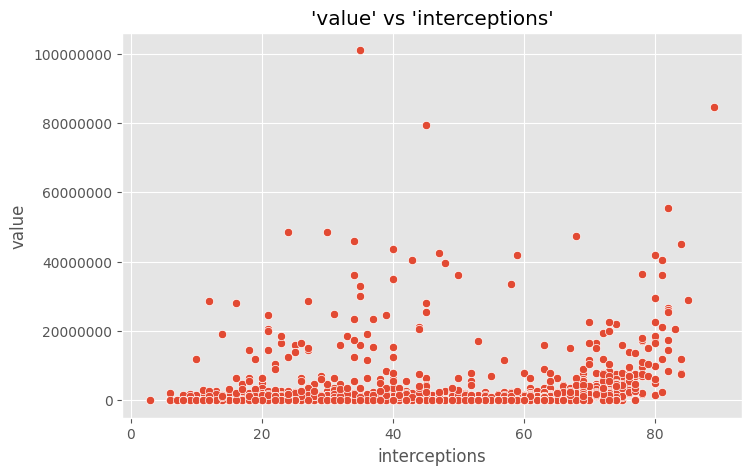

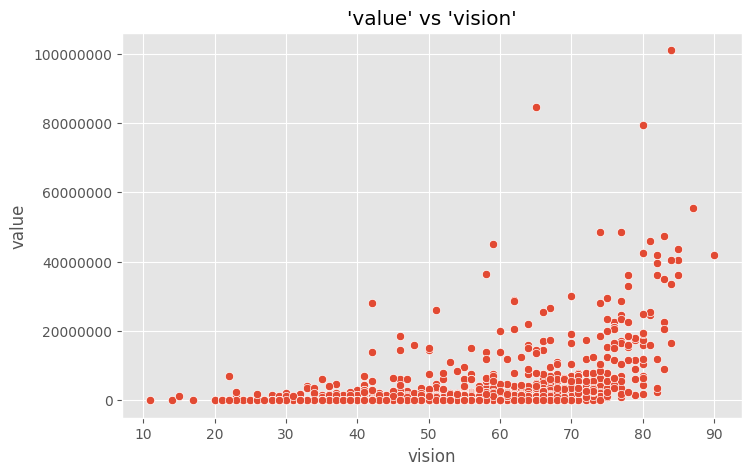

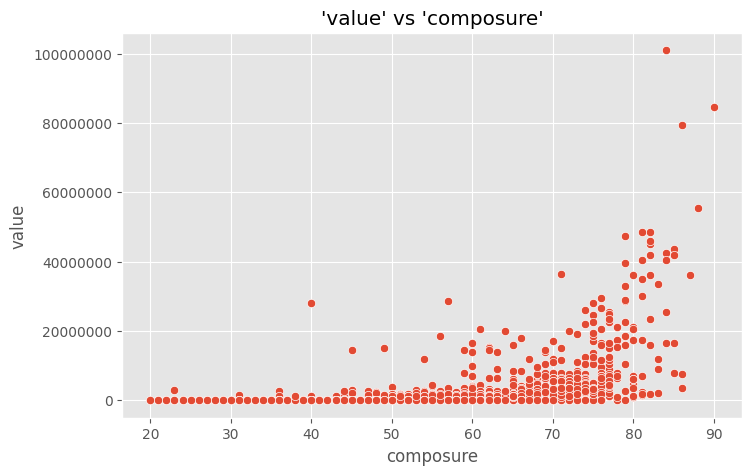

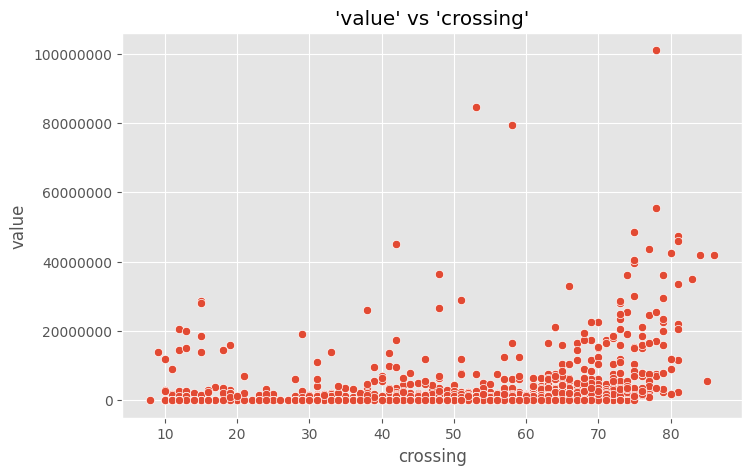

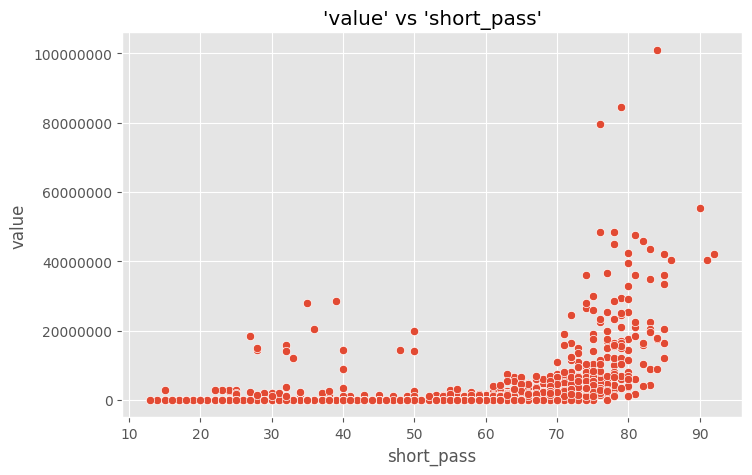

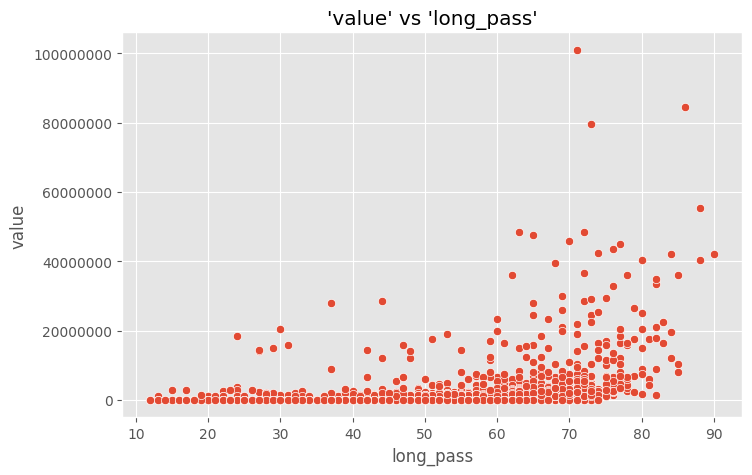

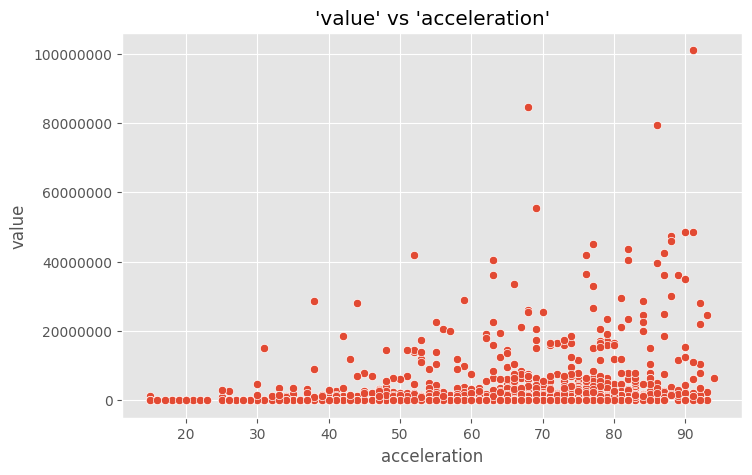

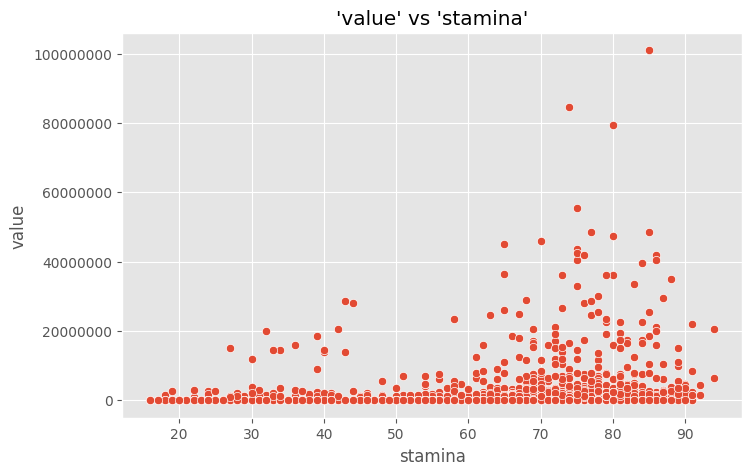

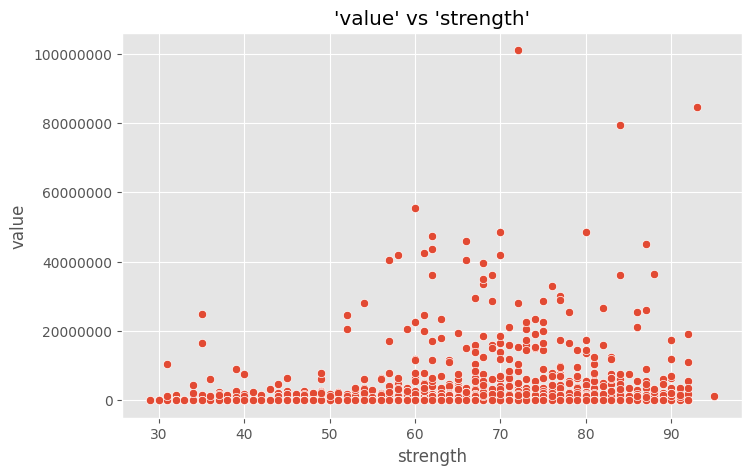

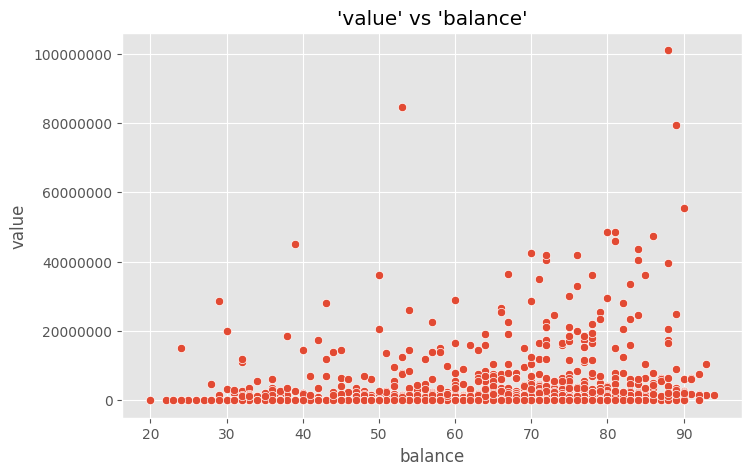

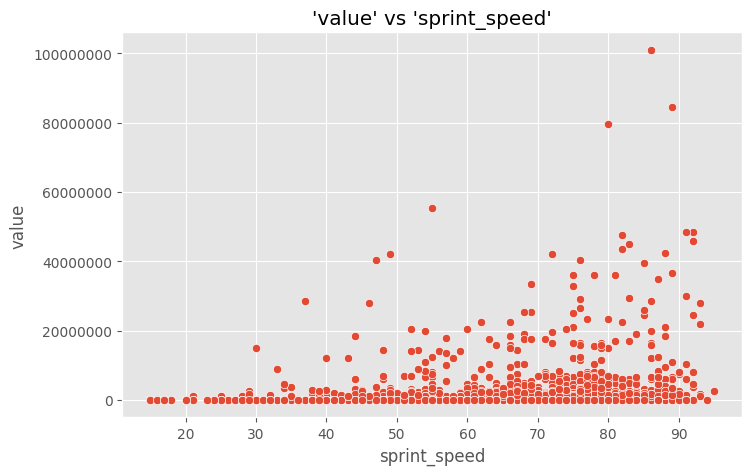

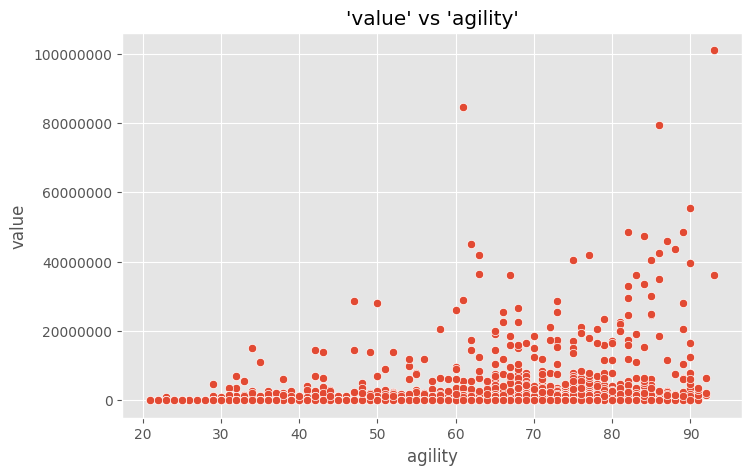

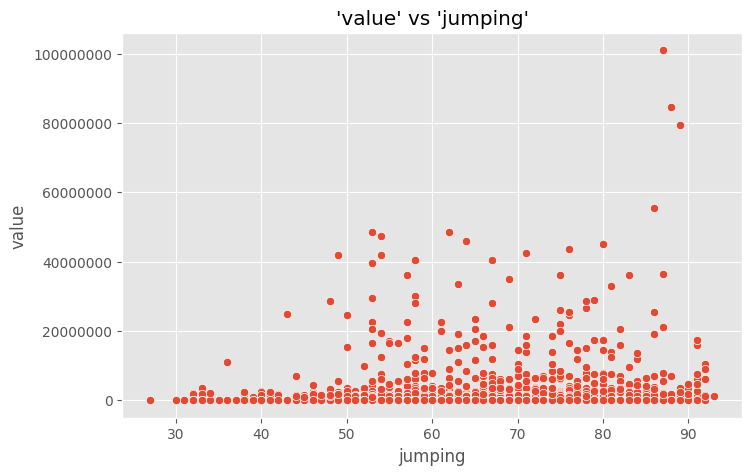

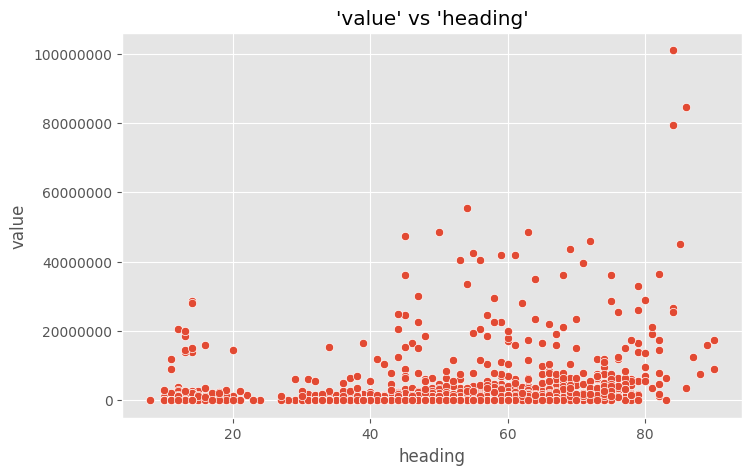

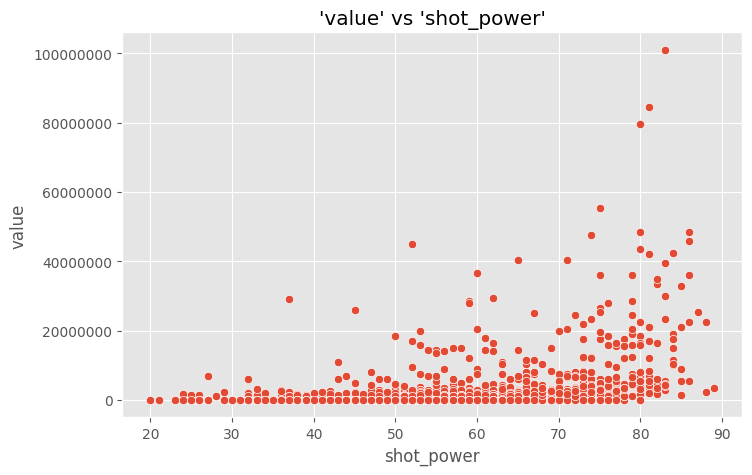

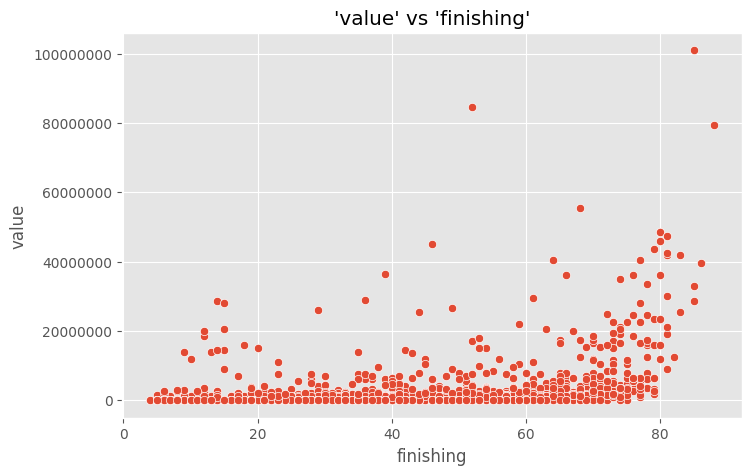

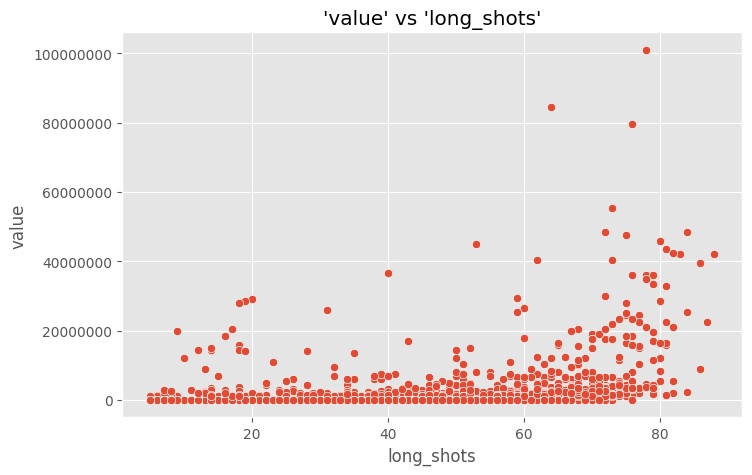

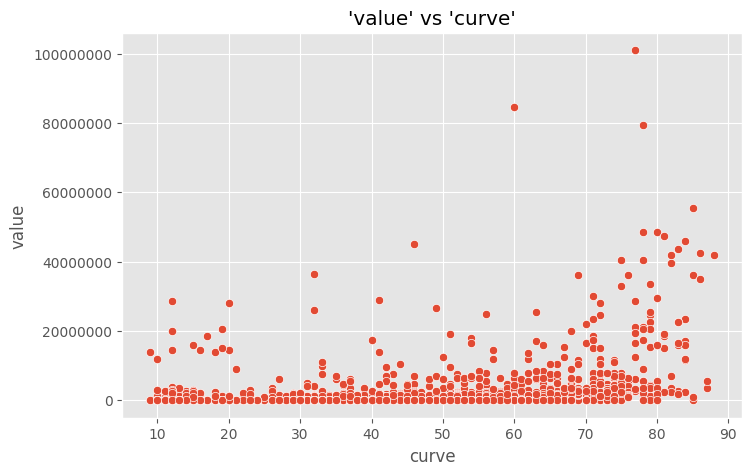

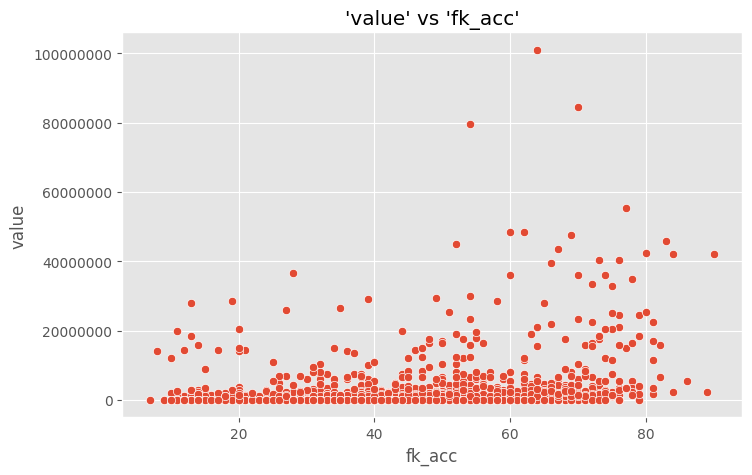

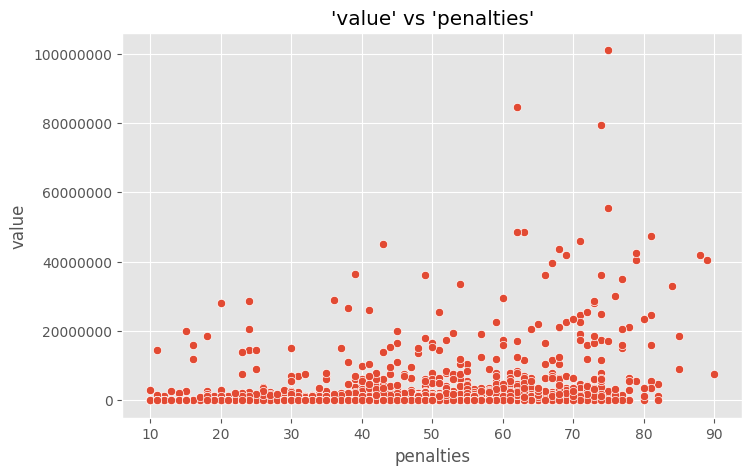

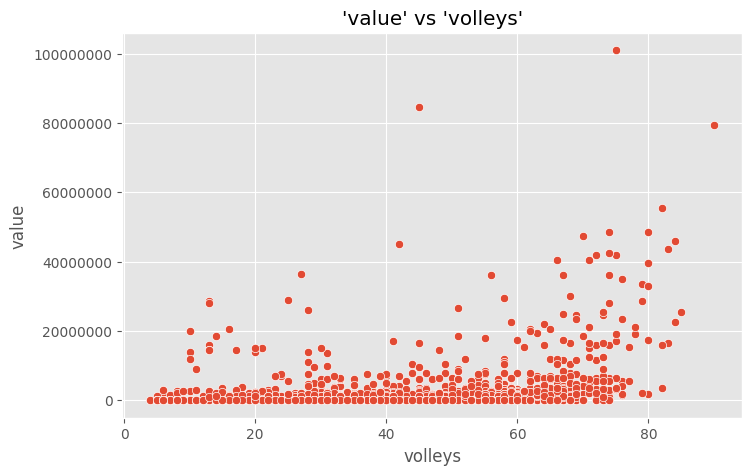

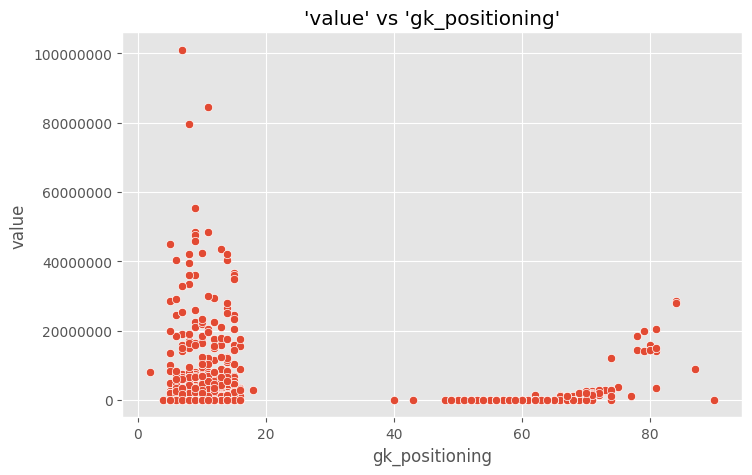

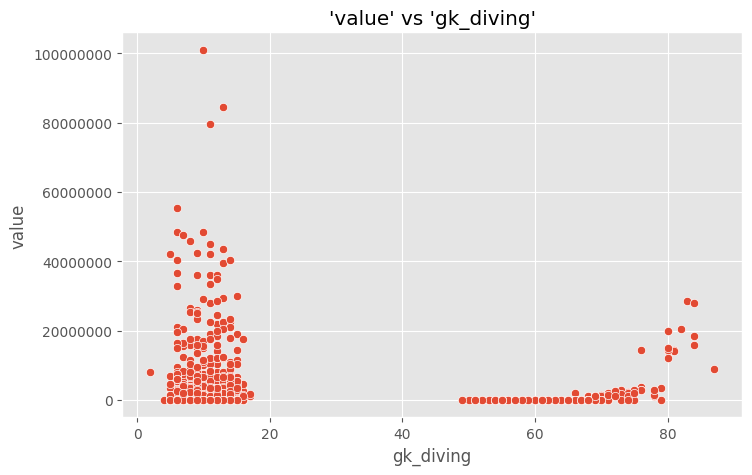

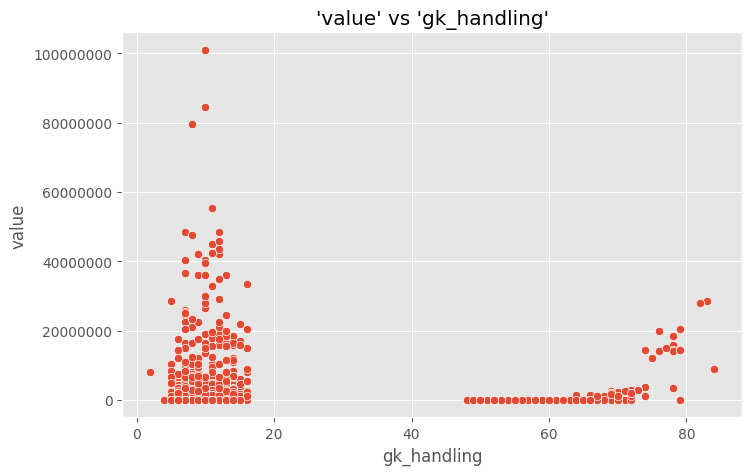

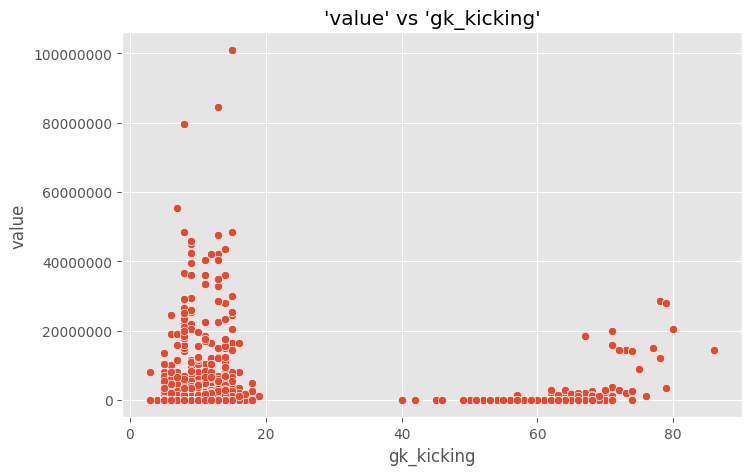

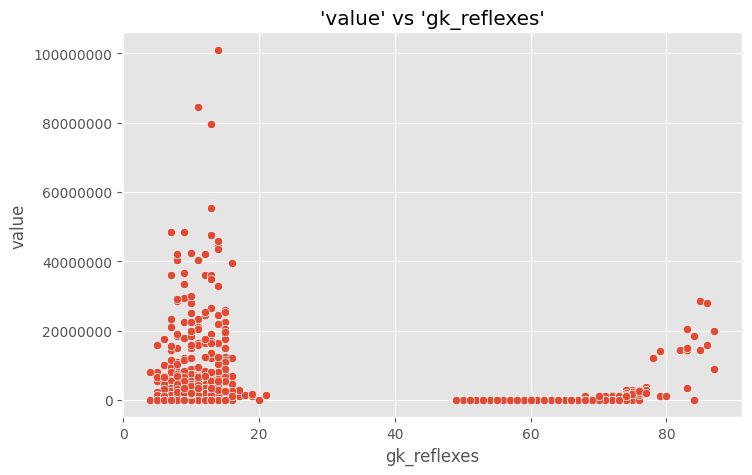

In [21]:
print(f"\n--- '{TARGET_COLUMN_NAME}' (value) ile Diğer Sayısal Özellikler Arasındaki İlişkiler (Scatter Plots) ---")

for col in numerical_cols:
    if col == TARGET_COLUMN_NAME: 
        continue
    
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df[TARGET_COLUMN_NAME])
    plt.title(f"'{TARGET_COLUMN_NAME}' vs '{col}'")
    plt.xlabel(col)
    plt.ylabel(TARGET_COLUMN_NAME)
    plt.ticklabel_format(style='plain', axis='y') 
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid(True) # Izgara ekleyelim
    plt.show()


--- 'value' (value) ile Önemli Kategorik Özellikler Arasındaki İlişkiler (Box Plots) ---


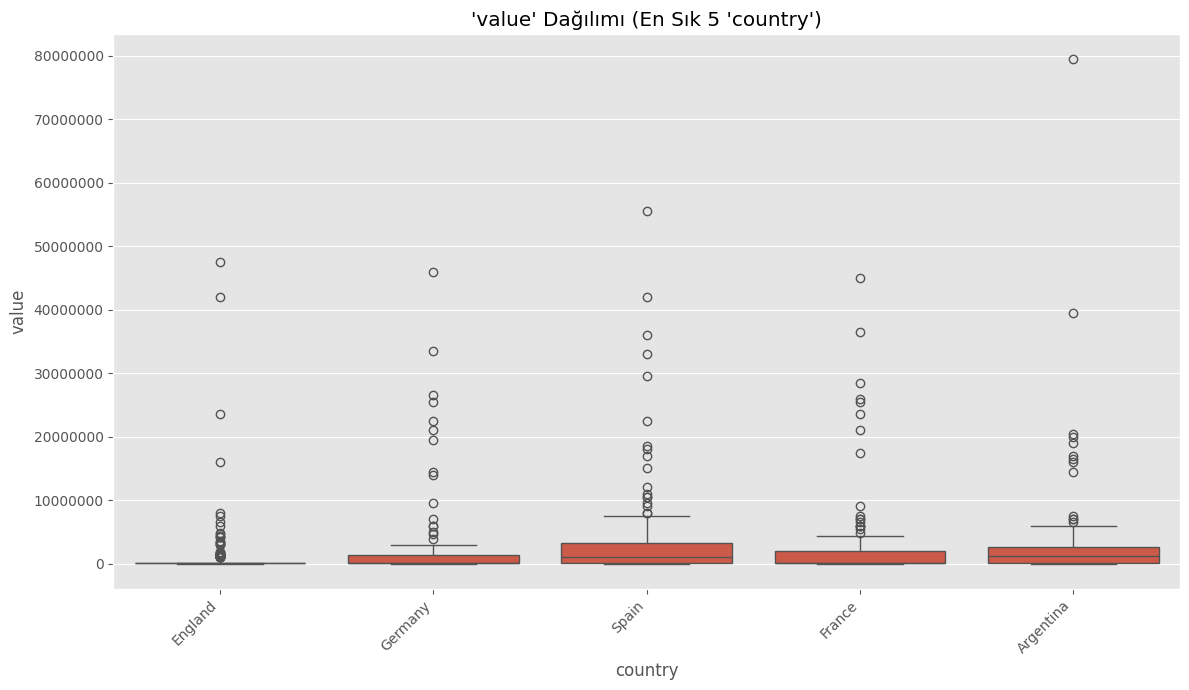

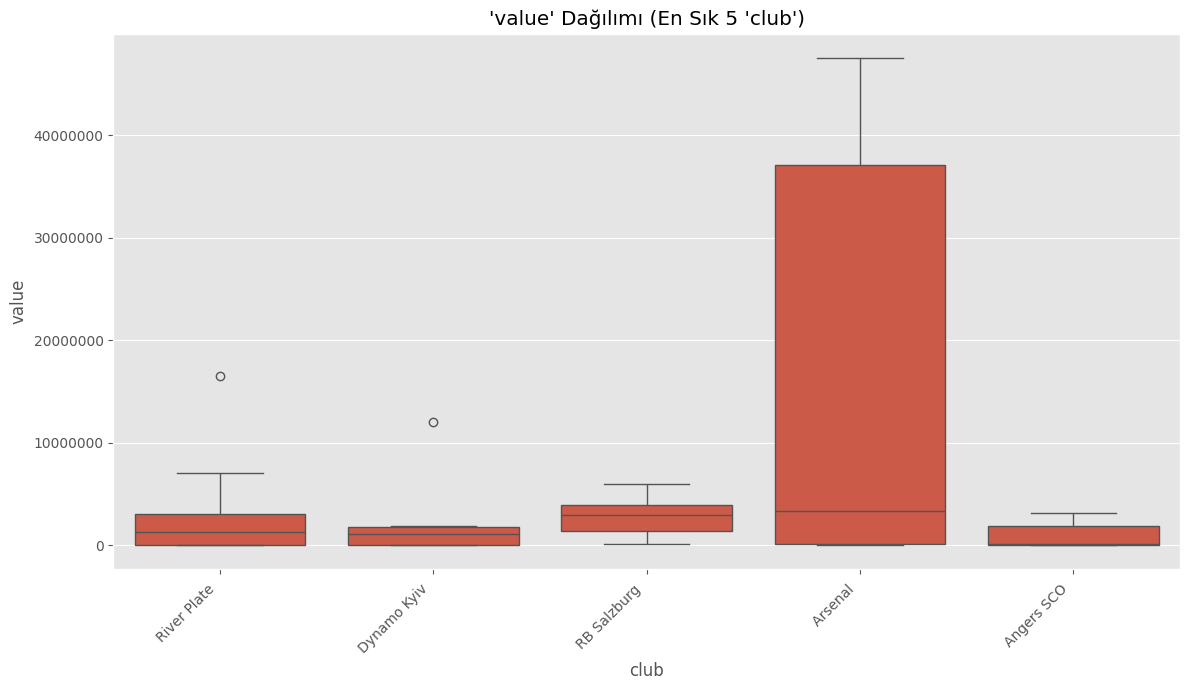

In [22]:
print(f"\n--- '{TARGET_COLUMN_NAME}' (value) ile Önemli Kategorik Özellikler Arasındaki İlişkiler (Box Plots) ---")
for col in categorical_cols_to_plot: 
    plt.figure(figsize=(12, 7)) 
    
    top_n_categories = 5 #
    if df[col].nunique() < top_n_categories:
        relevant_categories = df[col].value_counts().index.tolist()
    else:
        relevant_categories = df[col].value_counts().nlargest(top_n_categories).index.tolist()
    
    df_filtered_for_boxplot = df[df[col].isin(relevant_categories)]
    
    sns.boxplot(x=col, y=TARGET_COLUMN_NAME, data=df_filtered_for_boxplot, order=relevant_categories)
    plt.title(f"'{TARGET_COLUMN_NAME}' Dağılımı (En Sık {len(relevant_categories)} '{col}')")
    plt.xlabel(col)
    plt.ylabel(TARGET_COLUMN_NAME)
    plt.xticks(rotation=45, ha='right') # X ekseni etiketlerini okunaklı yap
    plt.ticklabel_format(style='plain', axis='y') # Y ekseni sayı formatı
    plt.grid(True, axis='y') # Y eksenine ızgara
    plt.tight_layout() # Grafik elemanlarının çakışmasını önle
    plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler        # Veri standardizasyonu için
from scipy.cluster.hierarchy import dendrogram, linkage # Hiyerarşik kümeleme ve dendrogram için

# Jupyter Notebook'ta grafiklerin hücrenin altında görünmesi için:
%matplotlib inline
plt.style.use('ggplot') # Grafik stili (isteğe bağlı)

In [24]:
print("--- Kümeleme İçin Veri Hazırlığı ---")

# df, önceki adımlardan (EDA sonrası) gelen DataFrame'iniz olmalı.
# Kümeleme için yeni bir DataFrame oluşturalım ki orijinal df etkilenmesin.
df_for_clustering = df.copy()

# Sadece sayısal sütunları seçelim
numerical_cols_for_clustering = df_for_clustering.select_dtypes(include=np.number).columns.tolist()
df_cluster_features = df_for_clustering[numerical_cols_for_clustering].copy()
print(f"Başlangıçta seçilen sayısal özellikler: {df_cluster_features.columns.tolist()}")

# Sınıf etiketini (hedef değişken 'value') çıkaralım
if 'value' in df_cluster_features.columns:
    df_cluster_features = df_cluster_features.drop('value', axis=1)
    print("'value' (sınıf etiketi) kümeleme özelliklerinden çıkarıldı.")

# Kümelemeye uygun olmayan başka sayısal ID benzeri sütunlar varsa onları da çıkarın.
# Örneğin, eğer 'player_id' gibi sayısal bir ID sütununuz olsaydı:
# if 'player_id' in df_cluster_features.columns:
#     df_cluster_features = df_cluster_features.drop('player_id', axis=1)
#     print("'player_id' kümeleme özelliklerinden çıkarıldı.")

print("\nKümeleme için son kullanılan özellikler:")
print(df_cluster_features.columns.tolist())
print(f"Özellik sayısı: {df_cluster_features.shape[1]}")
print("İlk 5 satır:")
print(df_cluster_features.head())

# Eksik değer kontrolü (bu aşamada eksik değer olmamalı)
if df_cluster_features.isnull().sum().any():
    print("\nUYARI: Kümeleme verisinde eksik değerler var! Lütfen kontrol edin ve doldurun.")
    # Örnek doldurma: df_cluster_features.fillna(df_cluster_features.mean(), inplace=True)
else:
    print("\nKümeleme verisinde eksik değer bulunmamaktadır.")

--- Kümeleme İçin Veri Hazırlığı ---
Başlangıçta seçilen sayısal özellikler: ['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'value']
'value' (sınıf etiketi) kümeleme özelliklerinden çıkarıldı.

Kümeleme için son kullanılan özellikler:
['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_

In [25]:
print("\n--- Veri Standardizasyonu ---")

# Orijinal ölçekli veri (standardize edilmemiş)
X_original_scale = df_cluster_features.copy()

# Veriyi standardize etme
scaler = StandardScaler()
# Eğer df_cluster_features boşsa veya sadece 1 satır içeriyorsa scaler hata verebilir.
if not X_original_scale.empty and X_original_scale.shape[0] > 1:
    X_scaled_array = scaler.fit_transform(X_original_scale)
    X_scaled_df = pd.DataFrame(X_scaled_array, columns=X_original_scale.columns, index=X_original_scale.index)

    print("Standardize edilmiş verinin ilk 5 satırı:")
    print(X_scaled_df.head())
    print("\nStandardize edilmiş verinin betimsel istatistikleri (ortalama ~0, std ~1 olmalı):")
    print(X_scaled_df.describe().round(2)) # .round(2) ile daha okunaklı
else:
    print("Standardizasyon için yeterli veri yok (DataFrame boş veya tek satır).")
    X_scaled_df = pd.DataFrame() # Hata durumunda boş DataFrame


--- Veri Standardizasyonu ---
Standardize edilmiş verinin ilk 5 satırı:
        height    weight       age  ball_control  dribbling  slide_tackle  \
2370  0.081303 -0.433373  1.013519     -0.387928  -0.411281      0.410986   
5485 -0.212475  0.146972 -0.255495      0.237561   0.138928      0.805667   
4178 -3.003361 -2.029323 -1.101504      0.175012   0.469052     -1.217072   
5426  0.962635  1.742922  0.590515      0.362658   0.469052      0.805667   
4177  0.962635 -0.433373  0.167510     -0.513026  -0.301239     -1.266408   

      stand_tackle  aggression  reactions  att_position  ...  long_shots  \
2370      0.442986    0.260486  -0.870782     -0.483626  ...   -0.439623   
5485      0.491346   -0.099425   0.126297      0.507678  ...   -0.492272   
4178     -1.249645   -0.099425  -0.759995     -0.014061  ...    0.876613   
5426      0.733151    0.620397  -0.206063      0.142461  ...    0.455417   
4177     -0.766036   -1.659040  -0.870782     -0.066235  ...    0.192170   

       


--- Hiyerarşik Kümeleme ve Dendrogramlar ---

1. Orijinal Ölçekli Veri ile Dendrogram:


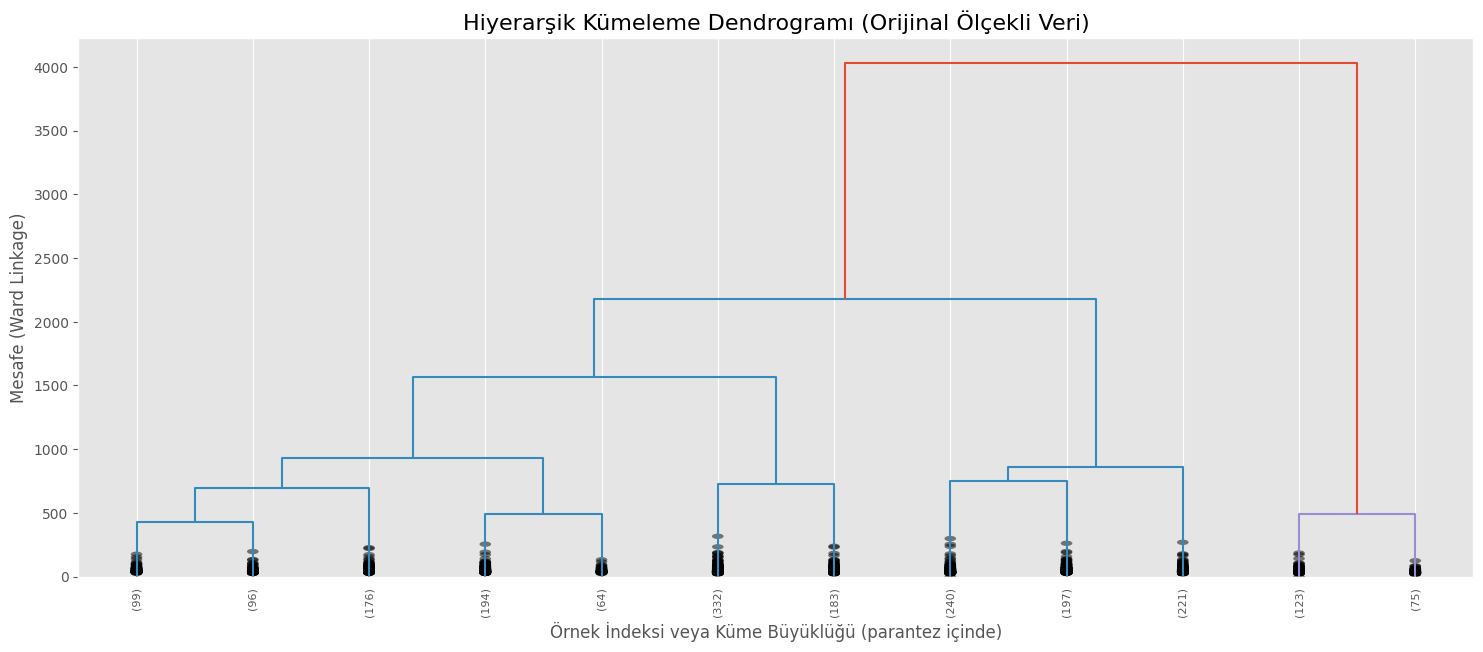


2. Standardize Edilmiş Veri ile Dendrogram:


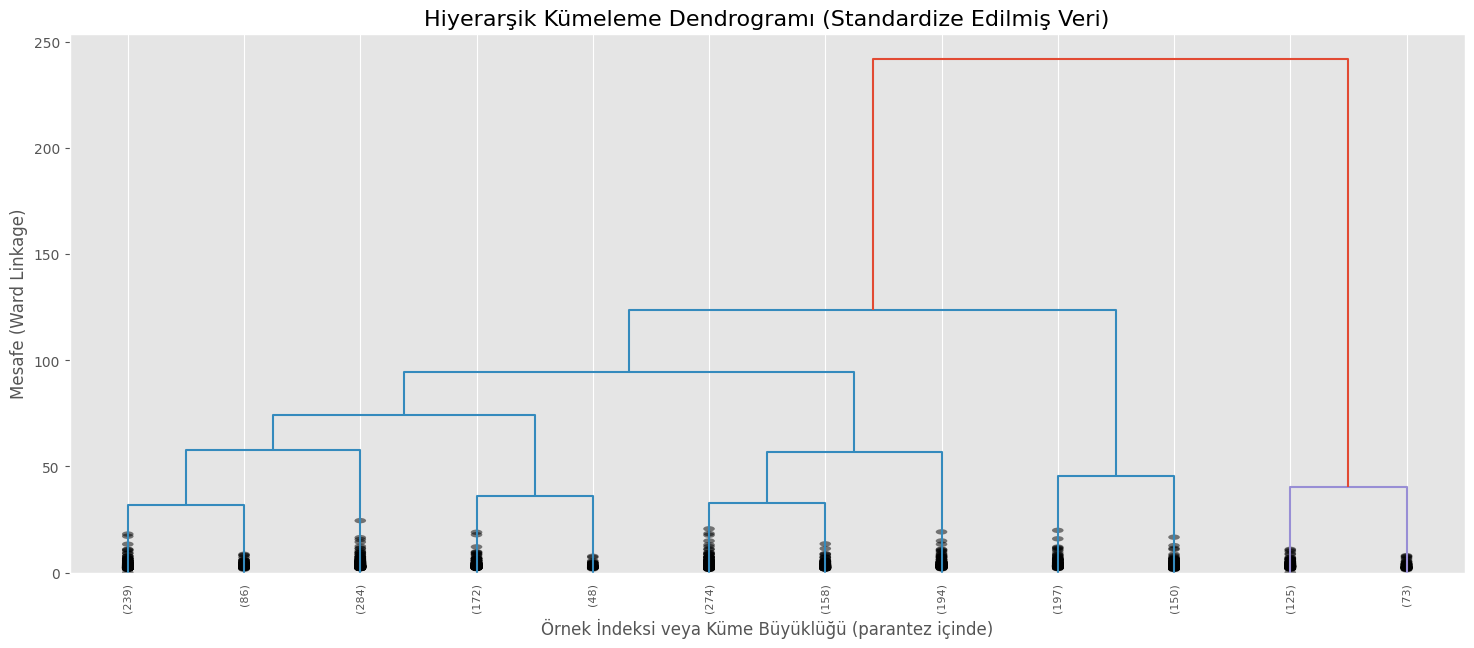

In [26]:
print("\n--- Hiyerarşik Kümeleme ve Dendrogramlar ---")

# Fonksiyon: Dendrogram çizdirmek için (tekrarı önlemek amacıyla)
def plot_dendrogram(linked_matrix, title_suffix, p_truncate=10):
    plt.figure(figsize=(18, 7)) # Grafiği biraz daha geniş yapalım
    dendrogram(linked_matrix,
               orientation='top',
               distance_sort='descending',
               truncate_mode='lastp',  # Son p birleştirilmiş kümeyi göster
               p=p_truncate,         # Gösterilecek küme sayısı (truncate_mode='lastp' ise)
                                     # Veri noktanız (2000) için p=10 veya p=15 iyi bir başlangıç olabilir.
                                     # Daha fazla detay için p'yi artırabilirsiniz.
               show_leaf_counts=True,
               show_contracted=True,   # Küçültülmüş dalları göster
               leaf_rotation=90.,      # Yaprak etiketlerini 90 derece döndür (okunabilirlik için)
               leaf_font_size=8.)     # Yaprak etiket font boyutu
    plt.title(f'Hiyerarşik Kümeleme Dendrogramı ({title_suffix})', fontsize=16)
    plt.xlabel("Örnek İndeksi veya Küme Büyüklüğü (parantez içinde)", fontsize=12)
    plt.ylabel("Mesafe (Ward Linkage)", fontsize=12)
    plt.grid(axis='y') # Y eksenine ızgara ekleyelim
    plt.show()

# A. Standardize Edilmemiş (Orijinal Ölçekli) Veri ile Dendrogram
print("\n1. Orijinal Ölçekli Veri ile Dendrogram:")
if not X_original_scale.empty and X_original_scale.shape[0] > 1 and X_original_scale.shape[1] > 0:
    # linkage fonksiyonu için en az 1 özellik (sütun) ve 2 örnek (satır) olmalı
    try:
        linked_original = linkage(X_original_scale, method='ward', metric='euclidean')
        plot_dendrogram(linked_original, "Orijinal Ölçekli Veri", p_truncate=12) # p değerini deneyerek ayarlayın
    except Exception as e:
        print(f"Orijinal veri ile dendrogram oluşturulurken hata: {e}")
        print("Veri boyutları:", X_original_scale.shape)
        print("Veri içeriği (ilk 5 satır):\n", X_original_scale.head())
else:
    print("Orijinal ölçekli veri ile dendrogram çizmek için yeterli veya uygun veri yok.")
    if X_original_scale.empty: print("X_original_scale DataFrame'i boş.")
    elif X_original_scale.shape[0] <= 1: print(f"X_original_scale satır sayısı ({X_original_scale.shape[0]}) yetersiz.")
    elif X_original_scale.shape[1] == 0: print("X_original_scale'da hiç özellik (sütun) yok.")


# B. Standardize Edilmiş Veri ile Dendrogram
print("\n2. Standardize Edilmiş Veri ile Dendrogram:")
if not X_scaled_df.empty and X_scaled_df.shape[0] > 1 and X_scaled_df.shape[1] > 0:
    try:
        linked_scaled = linkage(X_scaled_df, method='ward', metric='euclidean')
        plot_dendrogram(linked_scaled, "Standardize Edilmiş Veri", p_truncate=12) # p değerini deneyerek ayarlayın
    except Exception as e:
        print(f"Standardize edilmiş veri ile dendrogram oluşturulurken hata: {e}")
        print("Veri boyutları:", X_scaled_df.shape)
        print("Veri içeriği (ilk 5 satır):\n", X_scaled_df.head())
else:
    print("Standardize edilmiş veri ile dendrogram çizmek için yeterli veya uygun veri yok.")
    if X_scaled_df.empty: print("X_scaled_df DataFrame'i boş.")
    elif X_scaled_df.shape[0] <= 1: print(f"X_scaled_df satır sayısı ({X_scaled_df.shape[0]}) yetersiz.")
    elif X_scaled_df.shape[1] == 0: print("X_scaled_df'de hiç özellik (sütun) yok.")

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [28]:
print("--- Regresyon İçin Veri Hazırlığı ---")



y = df['value'].copy() 

X = df.select_dtypes(include=np.number).copy()
if 'value' in X.columns: 
    X = X.drop('value', axis=1)


print("\nKullanılacak Özellikler (X):")
print(X.columns.tolist())
print("X'in ilk 5 satırı:")
print(X.head())

print("\nHedef Değişken (y) ilk 5 değeri:")
print(y.head())

if X.isnull().sum().any():
    print("\nUYARI: X (özellikler) içinde eksik değerler var! Bunlar doldurulmalı.")
else:
    print("\nX (özellikler) içinde eksik değer bulunmamaktadır.")


if 'YOUR_RANDOM_STATE' not in locals() and 'YOUR_RANDOM_STATE' not in globals():
    YOUR_RANDOM_STATE = 5024
    print(f"YOUR_RANDOM_STATE '{YOUR_RANDOM_STATE}' olarak ayarlandı.")


if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=YOUR_RANDOM_STATE)

    print(f"\nEğitim seti boyutu: X_train shape={X_train.shape}, y_train shape={y_train.shape}")
    print(f"Test seti boyutu: X_test shape={X_test.shape}, y_test shape={y_test.shape}")
else:
    print("\nUYARI: X veya y boş olduğu için train-test split yapılamadı.")


--- Regresyon İçin Veri Hazırlığı ---

Kullanılacak Özellikler (X):
['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']
X'in ilk 5 satırı:
      height  weight  age  ball_control  dribbling  slide_tackle  \
2370     182      72   31            53         49            55   
5485     180      76   25            63         59            63   
4178     161      61   21            62         65            22   
5426     188      87   29            65         65            63   
4177     188      72   27            51         51            21   

      stand_tackle  aggression  rea

In [29]:
print("\n--- Model Eğitimi ve Değerlendirmesi ---")

model_performance = {}

if 'YOUR_RANDOM_STATE' not in locals() and 'YOUR_RANDOM_STATE' not in globals():
    YOUR_RANDOM_STATE = 5024
    print(f"YOUR_RANDOM_STATE model eğitimi için '{YOUR_RANDOM_STATE}' olarak ayarlandı.")

# 1. Lineer Regresyon
print("\n1. Lineer Regresyon...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_performance['Linear Regression'] = {'MSE': mse_lr, 'RMSE': rmse_lr, 'R2 Score': r2_lr}
print(f"  MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R2 Score: {r2_lr:.4f}")


# 2. KNN Regresyon
print("\n2. KNN Regresyon (k=5)...")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
model_performance['KNN Regression (k=5)'] = {'MSE': mse_knn, 'RMSE': rmse_knn, 'R2 Score': r2_knn}
print(f"  MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}, R2 Score: {r2_knn:.4f}")


# 3. Decision Tree
print("\n3. Karar Ağacı Regresyonu...")
dt_model = DecisionTreeRegressor(random_state=YOUR_RANDOM_STATE)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_performance['Decision Tree Regression'] = {'MSE': mse_dt, 'RMSE': rmse_dt, 'R2 Score': r2_dt}
print(f"  MSE: {mse_dt:.2f}, RMSE: {rmse_dt:.2f}, R2 Score: {r2_dt:.4f}")


print("\n4. Random Forest Regresyonu...")
rf_model = RandomForestRegressor(random_state=YOUR_RANDOM_STATE, n_estimators=100) # n_estimators=100 iyi bir başlangıç
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_performance['Random Forest Regression'] = {'MSE': mse_rf, 'RMSE': rmse_rf, 'R2 Score': r2_rf}
print(f"  MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R2 Score: {r2_rf:.4f}")


print("\n--- Tüm Modellerin Performans Özeti ---")
performance_df = pd.DataFrame(model_performance).T 
performance_df = performance_df.sort_values(by='R2 Score', ascending=False) # R2'ye göre sırala
# MSE ve RMSE için formatlama
pd.options.display.float_format = '{:.2f}'.format
print(performance_df[['MSE', 'RMSE', 'R2 Score']])
pd.reset_option('display.float_format') # Ayarı sıfırla


--- Model Eğitimi ve Değerlendirmesi ---

1. Lineer Regresyon...
  MSE: 19019158698832.27, RMSE: 4361096.04, R2 Score: 0.3688

2. KNN Regresyon (k=5)...
  MSE: 7544702940475.00, RMSE: 2746762.27, R2 Score: 0.7496

3. Karar Ağacı Regresyonu...
  MSE: 10180215991875.00, RMSE: 3190645.07, R2 Score: 0.6622

4. Random Forest Regresyonu...
  MSE: 3940972609324.17, RMSE: 1985188.31, R2 Score: 0.8692

--- Tüm Modellerin Performans Özeti ---
                                       MSE       RMSE  R2 Score
Random Forest Regression  3940972609324.17 1985188.31      0.87
KNN Regression (k=5)      7544702940475.00 2746762.27      0.75
Decision Tree Regression 10180215991875.00 3190645.07      0.66
Linear Regression        19019158698832.27 4361096.04      0.37



--- KNN Regresyon Parametre Ayarlaması (k için en iyi değeri bulma) ---
1'dan 50'a kadar k değerleri deneniyor...
  k=10 için R2: 0.7230
  k=20 için R2: 0.6573
  k=30 için R2: 0.6192
  k=40 için R2: 0.5780
  k=50 için R2: 0.5581

En iyi k değeri: 3 (R2 Skoru: 0.7631)


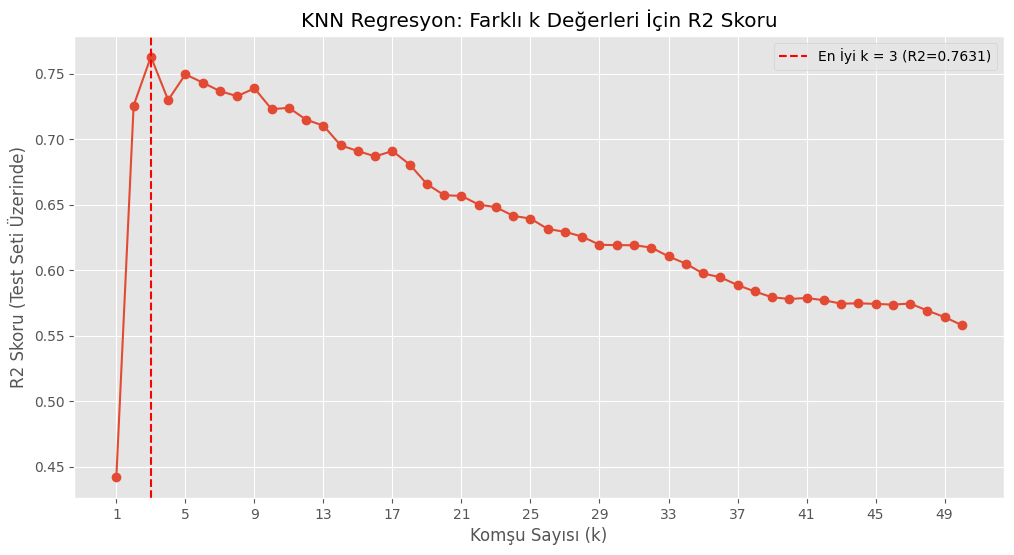


KNN Regresyon için fonksiyon tarafından bulunan en iyi k: 3 (R2 Skoru: 0.7631)


In [30]:
print("\n--- KNN Regresyon Parametre Ayarlaması (k için en iyi değeri bulma) ---")

def find_best_k_for_knn_regressor(X_train, y_train, X_test, y_test, min_k=1, max_k=50):
    """
    Farklı k değerleri için KNN Regresyon modellerini eğitir ve test eder,
    en iyi R2 skorunu veren k değerini döndürür.
    Ayrıca R2 skorlarının k'ya göre grafiğini çizer.
    """
    k_values = list(range(min_k, max_k + 1))
    r2_scores_for_k = []
    best_k = min_k
    best_r2 = -float('inf') 

    print(f"{min_k}'dan {max_k}'a kadar k değerleri deneniyor...")
    for k in k_values:
        knn_temp_model = KNeighborsRegressor(n_neighbors=k)
        knn_temp_model.fit(X_train, y_train)
        y_pred_temp = knn_temp_model.predict(X_test)
        current_r2 = r2_score(y_test, y_pred_temp)
        r2_scores_for_k.append(current_r2)

        if current_r2 > best_r2:
            best_r2 = current_r2
            best_k = k
        
        # İlerleme göstermek için (isteğe bağlı, çok fazla k varsa)
        if k % 10 == 0:
            print(f"  k={k} için R2: {current_r2:.4f}")

    print(f"\nEn iyi k değeri: {best_k} (R2 Skoru: {best_r2:.4f})")

    # k değerlerine karşılık R2 skorlarını çizdirelim
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, r2_scores_for_k, marker='o', linestyle='-')
    plt.title('KNN Regresyon: Farklı k Değerleri İçin R2 Skoru')
    plt.xlabel('Komşu Sayısı (k)')
    plt.ylabel('R2 Skoru (Test Seti Üzerinde)')
    plt.xticks(np.arange(min_k, max_k + 1, step=max(1, (max_k - min_k) // 10))) # X ekseni aralıkları
    plt.grid(True)
    plt.axvline(best_k, color='red', linestyle='--', label=f'En İyi k = {best_k} (R2={best_r2:.4f})')
    plt.legend()
    plt.show()

    return best_k, best_r2

# Fonksiyonu çağıralım
# X_train, y_train, X_test, y_test daha önceki adımdan gelmeli
if 'X_train' in locals() and 'y_train' in locals() and 'X_test' in locals() and 'y_test' in locals():
    best_k_found, best_r2_found = find_best_k_for_knn_regressor(X_train, y_train, X_test, y_test, min_k=1, max_k=50)
    print(f"\nKNN Regresyon için fonksiyon tarafından bulunan en iyi k: {best_k_found} (R2 Skoru: {best_r2_found:.4f})")

    # Bu en iyi k ile modeli tekrar eğitip performansını genel tabloya ekleyebilirsiniz (isteğe bağlı)
    # knn_best_model = KNeighborsRegressor(n_neighbors=best_k_found)
    # knn_best_model.fit(X_train, y_train)
    # y_pred_knn_best = knn_best_model.predict(X_test)
    # mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
    # rmse_knn_best = np.sqrt(mse_knn_best)
    # r2_knn_best = r2_score(y_test, y_pred_knn_best) # Bu best_r2_found ile aynı olmalı
    # model_performance[f'KNN Regression (k={best_k_found})'] = {'MSE': mse_knn_best, 'RMSE': rmse_knn_best, 'R2 Score': r2_knn_best}
    # print(f"\nEn iyi k ({best_k_found}) ile KNN Regresyon performansı:")
    # print(f"  MSE: {mse_knn_best:.2f}, RMSE: {rmse_knn_best:.2f}, R2 Score: {r2_knn_best:.4f}")

else:
    print("UYARI: KNN parametre ayarı için X_train, y_train, X_test, y_test tanımlı değil.")

In [32]:
# Bu en iyi k ile modeli tekrar eğitip performansını genel tabloya ekleyebilirsiniz (isteğe bağlı)
knn_best_model = KNeighborsRegressor(n_neighbors=best_k_found) # best_k_found = 3
knn_best_model.fit(X_train, y_train)
y_pred_knn_best = knn_best_model.predict(X_test)

mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
rmse_knn_best = np.sqrt(mse_knn_best)
r2_knn_best = r2_score(y_test, y_pred_knn_best) # Bu best_r2_found ile aynı olmalı (0.7631)

# Önceki k=5 girdisini silip yenisini ekleyebilir veya ikisini de tutabilirsiniz.
# Silelim:
if 'KNN Regression (k=5)' in model_performance:
    del model_performance['KNN Regression (k=5)']
    
model_performance[f'KNN Regression (k={best_k_found})'] = {'MSE': mse_knn_best, 'RMSE': rmse_knn_best, 'R2 Score': r2_knn_best}

print(f"\nEn iyi k ({best_k_found}) ile KNN Regresyon performansı:")
print(f"  MSE: {mse_knn_best:.2f}, RMSE: {rmse_knn_best:.2f}, R2 Score: {r2_knn_best:.4f}")

print("\n--- Güncellenmiş Tüm Modellerin Performans Özeti ---")
performance_df_updated = pd.DataFrame(model_performance).T
performance_df_updated = performance_df_updated.sort_values(by='R2 Score', ascending=False)
pd.options.display.float_format = '{:.2f}'.format
print(performance_df_updated[['MSE', 'RMSE', 'R2 Score']])
pd.reset_option('display.float_format')


En iyi k (3) ile KNN Regresyon performansı:
  MSE: 7138841087083.33, RMSE: 2671860.98, R2 Score: 0.7631

--- Güncellenmiş Tüm Modellerin Performans Özeti ---
                                       MSE       RMSE  R2 Score
Random Forest Regression  3940972609324.17 1985188.31      0.87
KNN Regression (k=3)      7138841087083.33 2671860.98      0.76
Decision Tree Regression 10180215991875.00 3190645.07      0.66
Linear Regression        19019158698832.27 4361096.04      0.37


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score # Çapraz doğrulama için
from sklearn.preprocessing import StandardScaler # KNN için özellik ölçeklendirme gerekebilir
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.utils import resample # Downsampling için
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
print("--- Sınıflandırma İçin İkili Hedef Değişken Oluşturma ---")

# df, önceki adımlardan gelen ana DataFrame'iniz olmalı.
# Sınıflandırma için yeni bir DataFrame kopyası oluşturalım ki orijinal df etkilenmesin.
df_classification = df.copy()

# 'value' sütununa göre ikili bir hedef oluşturalım
median_value = df_classification['value'].median()
print(f"Oyuncu değerleri için medyan değer: {median_value:.2f}")

# Yeni hedef sütun: 'value_class' (0: düşük/orta, 1: yüksek)
df_classification['value_class'] = (df_classification['value'] >= median_value).astype(int)
# Alternatif: (df_classification['value'] > median_value).astype(int) # Sadece medyandan büyük olanlar 1
# Proje tanımı 0 ve 1 istediği için bu şekilde bırakmak daha iyi.

print("\nOluşturulan 'value_class' sütununun ilk 5 değeri ve orijinal 'value' değerleri:")
print(df_classification[['value', 'value_class']].head())

print("\n'value_class' dağılımı:")
print(df_classification['value_class'].value_counts(normalize=True) * 100) # Yüzdesel dağılım

--- Sınıflandırma İçin İkili Hedef Değişken Oluşturma ---
Oyuncu değerleri için medyan değer: 75000.00

Oluşturulan 'value_class' sütununun ilk 5 değeri ve orijinal 'value' değerleri:
        value  value_class
2370  19000.0            0
5485  27500.0            0
4178  27500.0            0
5426  62500.0            0
4177  12000.0            0

'value_class' dağılımı:
value_class
1    51.3
0    48.7
Name: proportion, dtype: float64


In [35]:
print("\n--- Veri Seti Dengesi Kontrolü ---")
class_counts = df_classification['value_class'].value_counts()
print("Sınıf Dağılımı ('value_class'):")
print(class_counts)

is_balanced = abs(class_counts[0] - class_counts[1]) / len(df_classification) < 0.1 # Örnek bir denge kriteri (fark %10'dan azsa)
# Veya daha basitçe:
# is_balanced = class_counts[0] == class_counts[1] # Tam eşitlik nadirdir

if class_counts[0] == class_counts[1]: # Medyan kullandığımız için çok yakın veya eşit olmalı
    print("\nVeri seti 'value_class' hedef değişkeni için DENGELİ görünüyor (veya çok yakın).")
    # YORUM (Rapor için):
    # "Hedef değişkenimiz olan 'value_class', 'value' sütununun medyan değerine göre oluşturulduğu için,
    # Sınıf 0 ve Sınıf 1 örnek sayıları birbirine çok yakın veya eşittir. Bu nedenle veri setimiz
    # bu sınıflandırma görevi için DENGELİ kabul edilebilir."
else:
    print("\nVeri seti 'value_class' hedef değişkeni için DENGESİZ görünüyor.")
    # YORUM (Rapor için - Eğer dengesiz çıksaydı):
    # "Hedef değişkenimiz olan 'value_class' incelendiğinde, Sınıf X (%A) ve Sınıf Y (%B) arasında
    # örnek sayılarında belirgin bir fark olduğu görülmektedir. Bu nedenle veri setimiz DENGESİZDİR."

print("\n--- Dengesiz Veri Seti Kullanmanın Sorunları ---")
# YORUM (Rapor için):
# "Dengesiz bir veri setini makine öğrenmesi modeli eğitimi için kullanmanın temel sorunları şunlardır:
# 1.  Modelin Çoğunluk Sınıfına Yanlı Olması: Modeller, çoğunluk sınıfını doğru tahmin etmeye daha fazla ağırlık verir,
#     çünkü bu genel doğruluğu (accuracy) maksimize etmelerini sağlar. Sonuç olarak, azınlık sınıfını
#     iyi öğrenemezler ve onu genellikle yanlış sınıflandırırlar.
# 2.  Yanlı Performans Metrikleri: Özellikle 'accuracy' (doğruluk) metriği yanıltıcı olabilir.
#     Örneğin, %90 çoğunluk sınıfı ve %10 azınlık sınıfı olan bir durumda, model her şeyi çoğunluk sınıfı
#     olarak tahmin etse bile %90 doğruluk elde eder, ancak azınlık sınıfı için performansı sıfırdır.
#     Precision, recall ve F1-skoru gibi metrikler, özellikle azınlık sınıfı için, daha bilgilendiricidir.
# 3.  Azınlık Sınıfının Yetersiz Temsili: Model, azınlık sınıfının özelliklerini ve örüntülerini
#     öğrenmek için yeterli örneğe sahip olmayabilir."


--- Veri Seti Dengesi Kontrolü ---
Sınıf Dağılımı ('value_class'):
value_class
1    1026
0     974
Name: count, dtype: int64

Veri seti 'value_class' hedef değişkeni için DENGESİZ görünüyor.

--- Dengesiz Veri Seti Kullanmanın Sorunları ---


In [36]:
df_balanced = df_classification.copy() # Başlangıçta dengelenmiş df, orijinal df_classification'ın kopyası

if not (class_counts[0] == class_counts[1]): # Eğer tam dengeli değilse
    print("\n--- Veri Setini Dengeleme (Downsampling) ---")
    
    count_class_0, count_class_1 = class_counts[0], class_counts[1]

    # Azınlık ve çoğunluk sınıflarını belirle
    if count_class_0 > count_class_1:
        df_majority = df_classification[df_classification['value_class'] == 0]
        df_minority = df_classification[df_classification['value_class'] == 1]
        majority_label = 0
        minority_count = count_class_1
    else:
        df_majority = df_classification[df_classification['value_class'] == 1]
        df_minority = df_classification[df_classification['value_class'] == 0]
        majority_label = 1
        minority_count = count_class_0
    
    print(f"Çoğunluk sınıfı: {majority_label}, Örnek sayısı: {df_majority.shape[0]}")
    print(f"Azınlık sınıfı: {1-majority_label}, Örnek sayısı: {minority_count}")

    # Çoğunluk sınıfını azınlık sınıfı sayısına indirge (downsample)
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # Örnekleri yerine koymadan çek (downsampling)
                                     n_samples=minority_count, # Azınlık sınıfı sayısına eşitle
                                     random_state=YOUR_RANDOM_STATE) # Tekrarlanabilirlik için
                                     
    # Dengelenmiş veri setini oluştur
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    
    print("\nDownsampling sonrası sınıf dağılımı ('value_class'):")
    print(df_balanced['value_class'].value_counts())
    print("Dengelenmiş veri seti boyutu:", df_balanced.shape)
else:
    print("\nVeri seti zaten dengeli olduğu için downsampling işlemine gerek duyulmadı.")
    # df_balanced zaten df_classification'ın bir kopyası olarak kalacak


--- Veri Setini Dengeleme (Downsampling) ---
Çoğunluk sınıfı: 1, Örnek sayısı: 1026
Azınlık sınıfı: 0, Örnek sayısı: 974

Downsampling sonrası sınıf dağılımı ('value_class'):
value_class
1    974
0    974
Name: count, dtype: int64
Dengelenmiş veri seti boyutu: (1948, 41)


In [37]:
print("--- Dengelenmiş Veri Seti ile Sınıflandırma Modelleri ---")

# 1. Özellikleri (X_b) ve Hedefi (y_b) Ayırma
if 'value_class' in df_balanced.columns:
    y_b = df_balanced['value_class'].copy()
    # X_b için sayısal özellikleri alalım (regresyondaki gibi)
    # 'value' sütunu zaten df_balanced'da olmalı (orijinal df'ten geldi)
    # ama sınıflandırma hedefimiz 'value_class' olduğu için 'value'yu özellik olarak kullanabiliriz.
    # VEYA regresyondaki gibi sadece diğer sayısal özellikleri kullanabiliriz.
    # Şimdilik regresyondaki X'e benzer bir X_b oluşturalım:
    X_b = df_balanced.select_dtypes(include=np.number).copy()
    if 'value_class' in X_b.columns: # Hedef değişkeni özelliklerden çıkar
        X_b = X_b.drop('value_class', axis=1)
    # Eğer 'value' sütununu da özellik olarak kullanmak istemiyorsak (çünkü 'value_class' ondan türetildi):
    if 'value' in X_b.columns:
         X_b = X_b.drop('value', axis=1)
         print("'value' sütunu sınıflandırma özelliklerinden (X_b) çıkarıldı.")

    print("\nSınıflandırma için kullanılacak özellikler (X_b):")
    print(X_b.columns.tolist())
    print("X_b'nin ilk 5 satırı:")
    print(X_b.head())
    print("\nSınıflandırma hedefi (y_b) ilk 5 değeri:")
    print(y_b.head())

    # Eksik değer kontrolü (X_b içinde eksik değer olmamalı)
    if X_b.isnull().sum().any():
        print("\nUYARI: X_b (özellikler) içinde eksik değerler var! Bunlar doldurulmalı.")
        X_b.fillna(X_b.mean(), inplace=True) # Basit bir doldurma
        print("Eksik değerler ortalama ile dolduruldu.")
    else:
        print("\nX_b (özellikler) içinde eksik değer bulunmamaktadır.")

    # 2. Eğitim ve Test Setlerine Bölme (Dengelenmiş Veriden)
    # YOUR_RANDOM_STATE'in tanımlı olduğundan emin olalım
    if 'YOUR_RANDOM_STATE' not in locals() and 'YOUR_RANDOM_STATE' not in globals():
        YOUR_RANDOM_STATE = 5024
        print(f"YOUR_RANDOM_STATE '{YOUR_RANDOM_STATE}' olarak ayarlandı (train_test_split için).")

    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
        X_b, y_b, test_size=0.20, random_state=YOUR_RANDOM_STATE, stratify=y_b # stratify önemli
    )
    print(f"\nDengelenmiş eğitim seti boyutu: X_train_b shape={X_train_b.shape}, y_train_b shape={y_train_b.shape}")
    print(f"Dengelenmiş test seti boyutu: X_test_b shape={X_test_b.shape}, y_test_b shape={y_test_b.shape}")
    print("Eğitim setindeki sınıf dağılımı:\n", y_train_b.value_counts(normalize=True))
    print("Test setindeki sınıf dağılımı:\n", y_test_b.value_counts(normalize=True))


    # 3. Özellik Ölçeklendirme (Feature Scaling)
    scaler_clf = StandardScaler()
    X_train_b_scaled = scaler_clf.fit_transform(X_train_b)
    X_test_b_scaled = scaler_clf.transform(X_test_b)
    print("\nÖzellikler ölçeklendirildi (StandardScaler).")

    # Sonuçları saklamak için bir sözlük
    classification_performance = {}

    # 4. Modelleri Eğitme ve Performanslarını Raporlama

    # Model: Lojistik Regresyon
    print("\n--- Lojistik Regresyon ---")
    log_reg_model = LogisticRegression(random_state=YOUR_RANDOM_STATE, max_iter=1000, solver='liblinear') # solver ve max_iter ayarları
    log_reg_model.fit(X_train_b_scaled, y_train_b) # Ölçeklenmiş veriyi kullan
    y_pred_log_reg = log_reg_model.predict(X_test_b_scaled)
    classification_performance['Logistic Regression'] = {
        'Accuracy': accuracy_score(y_test_b, y_pred_log_reg),
        'Precision': precision_score(y_test_b, y_pred_log_reg, zero_division=0),
        'Recall': recall_score(y_test_b, y_pred_log_reg, zero_division=0)
    }
    print(classification_report(y_test_b, y_pred_log_reg, zero_division=0))

    # Model: KNN Sınıflandırma
    # Regresyonda bulduğumuz best_k_found değerini kullanabiliriz veya yeni bir k seçebiliriz.
    # Şimdilik k=3 (regresyondaki en iyi k) veya k=5 gibi bir değerle başlayalım.
    best_k_clf = 3 # Veya 5
    print(f"\n--- KNN Sınıflandırma (k={best_k_clf}) ---")
    knn_clf_model = KNeighborsClassifier(n_neighbors=best_k_clf)
    knn_clf_model.fit(X_train_b_scaled, y_train_b) # Ölçeklenmiş veriyi kullan
    y_pred_knn_clf = knn_clf_model.predict(X_test_b_scaled)
    classification_performance[f'KNN Classification (k={best_k_clf})'] = {
        'Accuracy': accuracy_score(y_test_b, y_pred_knn_clf),
        'Precision': precision_score(y_test_b, y_pred_knn_clf, zero_division=0),
        'Recall': recall_score(y_test_b, y_pred_knn_clf, zero_division=0)
    }
    print(classification_report(y_test_b, y_pred_knn_clf, zero_division=0))

    # Model: Karar Ağacı Sınıflandırma
    print("\n--- Karar Ağacı Sınıflandırma ---")
    dt_clf_model = DecisionTreeClassifier(random_state=YOUR_RANDOM_STATE)
    dt_clf_model.fit(X_train_b, y_train_b) # Ölçeklenmemiş veriyle de iyi çalışır, ama ölçeklenmiş de kullanılabilir
    y_pred_dt_clf = dt_clf_model.predict(X_test_b)
    classification_performance['Decision Tree Classification'] = {
        'Accuracy': accuracy_score(y_test_b, y_pred_dt_clf),
        'Precision': precision_score(y_test_b, y_pred_dt_clf, zero_division=0),
        'Recall': recall_score(y_test_b, y_pred_dt_clf, zero_division=0)
    }
    print(classification_report(y_test_b, y_pred_dt_clf, zero_division=0))

    # Model: Rastgele Orman Sınıflandırma
    print("\n--- Rastgele Orman Sınıflandırma ---")
    rf_clf_model = RandomForestClassifier(random_state=YOUR_RANDOM_STATE, n_estimators=100)
    rf_clf_model.fit(X_train_b, y_train_b) # Ölçeklenmemiş veriyle de iyi çalışır
    y_pred_rf_clf = rf_clf_model.predict(X_test_b)
    classification_performance['Random Forest Classification'] = {
        'Accuracy': accuracy_score(y_test_b, y_pred_rf_clf),
        'Precision': precision_score(y_test_b, y_pred_rf_clf, zero_division=0),
        'Recall': recall_score(y_test_b, y_pred_rf_clf, zero_division=0)
    }
    print(classification_report(y_test_b, y_pred_rf_clf, zero_division=0))


    # Performansları bir DataFrame'de özetleyelim
    print("\n--- Tüm Sınıflandırma Modellerinin Performans Özeti (Dengelenmiş Veri) ---")
    clf_performance_df = pd.DataFrame(classification_performance).T
    clf_performance_df = clf_performance_df.sort_values(by='Accuracy', ascending=False)
    # Metrikler için formatlama
    pd.options.display.float_format = '{:.4f}'.format
    print(clf_performance_df[['Accuracy', 'Precision', 'Recall']])
    pd.reset_option('display.float_format')

else:
    print("UYARI: 'value_class' hedef değişkeni 'df_balanced' içinde bulunamadı. Model eğitimi yapılamıyor.")

--- Dengelenmiş Veri Seti ile Sınıflandırma Modelleri ---
'value' sütunu sınıflandırma özelliklerinden (X_b) çıkarıldı.

Sınıflandırma için kullanılacak özellikler (X_b):
['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']
X_b'nin ilk 5 satırı:
      height  weight  age  ball_control  dribbling  slide_tackle  \
2273     172      70   24            69         68            28   
989      185      82   24            62         56            65   
2471     185      82   32            58         46            62   
808      194      86   26            56         43            69  

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [39]:
if 'X_b' in locals() and 'y_b' in locals():
    scaler_for_cv = StandardScaler()
    X_b_scaled_for_cv = scaler_for_cv.fit_transform(X_b)
    print("Çapraz doğrulama için X_b özellikleri ölçeklendirildi.")

    # Çapraz doğrulama için kat sayısı ve karıştırma ayarı
    # StratifiedKFold, sınıfların her katta orantılı dağılmasını sağlar, sınıflandırma için daha iyidir.
    cv_splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=YOUR_RANDOM_STATE)

    # 1. Lojistik Regresyon için Çapraz Doğrulama
    print("\n--- Lojistik Regresyon (10-Fold Cross-Validation) ---")
    log_reg_cv_model = LogisticRegression(random_state=YOUR_RANDOM_STATE, max_iter=1000, solver='liblinear')
    # 'accuracy' skorlamasını kullanacağız
    cv_scores_log_reg = cross_val_score(log_reg_cv_model, X_b_scaled_for_cv, y_b, cv=cv_splitter, scoring='accuracy')
    
    print("Her kat için doğruluk skorları (Lojistik Regresyon):")
    for i, score in enumerate(cv_scores_log_reg):
        print(f"  Kat {i+1}: {score:.4f}")
    print(f"Ortalama CV Doğruluğu (Lojistik Regresyon): {cv_scores_log_reg.mean():.4f}")
    print(f"CV Doğruluğu Standart Sapması (Lojistik Regresyon): {cv_scores_log_reg.std():.4f}")

    # Aşırı öğrenme yorumu için tek bir train-test split'teki skoru hatırlayalım
    accuracy_log_reg_single_split = classification_performance.get('Logistic Regression', {}).get('Accuracy', np.nan)
    print(f"Tek train-test split doğruluğu (Lojistik Regresyon): {accuracy_log_reg_single_split:.4f}")
    # YORUM (Overfitting için):
    # "Lojistik Regresyon için ortalama CV doğruluğu ({cv_scores_log_reg.mean():.4f}), 
    #  tek bir train-test split ile elde edilen doğrulukla ({accuracy_log_reg_single_split:.4f}) karşılaştırıldığında 
    #  [çok yakın/biraz düşük/biraz yüksek]. Katlar arasındaki doğruluk skorları [tutarlı/değişken] bir dağılım gösteriyor.
    #  Bu durum, modelin [aşırı öğrenmediğini / hafif bir aşırı öğrenme eğiliminde olduğunu / iyi genelleme yaptığını] düşündürmektedir."


    # 2. Rastgele Orman Sınıflandırma için Çapraz Doğrulama
    print("\n--- Rastgele Orman Sınıflandırma (10-Fold Cross-Validation) ---")
    # Rastgele Orman genellikle ölçeklendirmeye ihtiyaç duymaz, X_b'nin orijinalini (ama dengelenmiş) kullanabiliriz.
    # Ancak yukarıda X_b_scaled_for_cv'yi her ikisi için de kullanmaya karar vermiştik tutarlılık için.
    rf_clf_cv_model = RandomForestClassifier(random_state=YOUR_RANDOM_STATE, n_estimators=100)
    cv_scores_rf_clf = cross_val_score(rf_clf_cv_model, X_b_scaled_for_cv, y_b, cv=cv_splitter, scoring='accuracy') 
    # Alternatif (ölçeklenmemiş X_b ile):
    # cv_scores_rf_clf = cross_val_score(rf_clf_cv_model, X_b, y_b, cv=cv_splitter, scoring='accuracy')


    print("Her kat için doğruluk skorları (Rastgele Orman):")
    for i, score in enumerate(cv_scores_rf_clf):
        print(f"  Kat {i+1}: {score:.4f}")
    print(f"Ortalama CV Doğruluğu (Rastgele Orman): {cv_scores_rf_clf.mean():.4f}")
    print(f"CV Doğruluğu Standart Sapması (Rastgele Orman): {cv_scores_rf_clf.std():.4f}")

    accuracy_rf_clf_single_split = classification_performance.get('Random Forest Classification', {}).get('Accuracy', np.nan)
    print(f"Tek train-test split doğruluğu (Rastgele Orman): {accuracy_rf_clf_single_split:.4f}")
    # YORUM (Overfitting için):
    # "Rastgele Orman için ortalama CV doğruluğu ({cv_scores_rf_clf.mean():.4f}), 
    #  tek bir train-test split ile elde edilen doğrulukla ({accuracy_rf_clf_single_split:.4f}) karşılaştırıldığında 
    #  [çok yakın/biraz düşük/biraz yüksek]. Katlar arasındaki doğruluk skorları [tutarlı/değişken] bir dağılım gösteriyor.
    #  Standart sapmanın [düşük/orta/yüksek] olması, modelin performansının veri setinin farklı alt kümelerine göre
    #  [tutarlı olduğunu / değişkenlik gösterdiğini] belirtir. 
    #  Eğer ortalama CV skoru, tek split test skorundan belirgin şekilde düşükse, bu bir miktar aşırı öğrenmeye işaret edebilir."

else:
    print("UYARI: Çapraz doğrulama için X_b veya y_b tanımlı değil.")

Çapraz doğrulama için X_b özellikleri ölçeklendirildi.

--- Lojistik Regresyon (10-Fold Cross-Validation) ---
Her kat için doğruluk skorları (Lojistik Regresyon):
  Kat 1: 0.8718
  Kat 2: 0.8513
  Kat 3: 0.8667
  Kat 4: 0.8154
  Kat 5: 0.8667
  Kat 6: 0.8821
  Kat 7: 0.8974
  Kat 8: 0.8462
  Kat 9: 0.8866
  Kat 10: 0.8814
Ortalama CV Doğruluğu (Lojistik Regresyon): 0.8665
CV Doğruluğu Standart Sapması (Lojistik Regresyon): 0.0226
Tek train-test split doğruluğu (Lojistik Regresyon): 0.8718

--- Rastgele Orman Sınıflandırma (10-Fold Cross-Validation) ---
Her kat için doğruluk skorları (Rastgele Orman):
  Kat 1: 0.9282
  Kat 2: 0.8872
  Kat 3: 0.8923
  Kat 4: 0.8615
  Kat 5: 0.9385
  Kat 6: 0.9026
  Kat 7: 0.9179
  Kat 8: 0.8821
  Kat 9: 0.9175
  Kat 10: 0.9278
Ortalama CV Doğruluğu (Rastgele Orman): 0.9056
CV Doğruluğu Standart Sapması (Rastgele Orman): 0.0232
Tek train-test split doğruluğu (Rastgele Orman): 0.9205
